## Telecom Churn : Case study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many incumbent operators, retaining high profitable customers is the number one business goal.
 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


In [431]:
## import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from time import ctime

In [432]:
## read the dataset into a dataframe
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
telecom = pd.read_csv('telecom_churn_data.csv',parse_dates=date_cols)

In [433]:
## set pandas options to display all rows and columns during display
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [434]:
## read the dataframe head to check if data is loaded ok
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [435]:
## check the shape of the dataframe
telecom.shape

(99999, 226)

In [436]:
##  check the dataframe info to understand the datatypes and null values in the columns
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mobile_number             99999 non-null  int64         
 1   circle_id                 99999 non-null  int64         
 2   loc_og_t2o_mou            98981 non-null  float64       
 3   std_og_t2o_mou            98981 non-null  float64       
 4   loc_ic_t2o_mou            98981 non-null  float64       
 5   last_date_of_month_6      99999 non-null  datetime64[ns]
 6   last_date_of_month_7      99398 non-null  datetime64[ns]
 7   last_date_of_month_8      98899 non-null  datetime64[ns]
 8   last_date_of_month_9      98340 non-null  datetime64[ns]
 9   arpu_6                    99999 non-null  float64       
 10  arpu_7                    99999 non-null  float64       
 11  arpu_8                    99999 non-null  float64       
 12  arpu_9           

In [437]:
## check the % of nulls in the columns
telecom.isnull().sum()/telecom.shape[0]*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [438]:
## check the % of zeros and nulls in each of the numerical columns
100-telecom.select_dtypes(include=np.number).fillna(0).astype(bool).sum(axis=0)/telecom.shape[0]*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou        100.000000
std_og_t2o_mou        100.000000
loc_ic_t2o_mou        100.000000
arpu_6                  3.731037
arpu_7                  3.862039
arpu_8                  5.622056
arpu_9                  9.069091
onnet_mou_6            12.865129
onnet_mou_7            13.150132
onnet_mou_8            14.797148
onnet_mou_9            18.572186
offnet_mou_6            7.652077
offnet_mou_7            7.699077
offnet_mou_8            9.554096
offnet_mou_9           12.961130
roam_ic_mou_6          80.684807
roam_ic_mou_7          85.153852
roam_ic_mou_8          85.547855
roam_ic_mou_9          86.861869
roam_og_mou_6          80.601806
roam_og_mou_7          85.203852
roam_og_mou_8          85.651857
roam_og_mou_9          87.104871
loc_og_t2t_mou_6       19.931199
loc_og_t2t_mou_7       19.623196
loc_og_t2t_mou_8       20.982210
loc_og_t2t_mou_9       24.065241
loc_og_t2m_mou_6       13.303133
loc_og_t2m

## Data Cleaning

####  Handle Missing Data,  Drop variables with no/very low information

In [439]:
## impute nulls with 0 for all the numeric columns
num_cols = telecom.select_dtypes(include=np.number).columns
telecom[num_cols] = telecom[num_cols].fillna(0)

Data Understanding for imputing nulls in numerical columns with 0

1. All MOU columns

Below are the Totals columns for MOU. These columns do not have any null values.  
total_og_mou_6
total_og_mou_7
total_og_mou_8
total_og_mou_9
total_ic_mou_6
total_ic_mou_7
total_ic_mou_8
total_ic_mou_9

However the MOU columns that add up to these total columns have NULLs.
Hence the non-Total MOU columns can be imputed with 0s. 

2. Total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, arpu_3g, arpu_2g, night_pck_user, fb_user

vol_2g_mb, vol_3g_mb, monthly_2g, sachet_2g_6, monthly_3g, sachet_3g_6 columns are 0 where Total_rech_data, max_rech_data, 
count_rech_2g, count_rech_3g, av_rech_amt_data,arpu_3g, arpu_2g, night_pck_user,fb_user are Nulls indicating that the 
customer did not recharge or consume data during the month.  Hence null values in thse columns have been imputed with 0

In [440]:
## impute the nulls in the last date columns with the respective last dates of the months
telecom['last_date_of_month_7'] = telecom['last_date_of_month_7'].fillna(datetime(2014,7,31))
telecom['last_date_of_month_8'] = telecom['last_date_of_month_8'].fillna(datetime(2014,8,31))
telecom['last_date_of_month_9'] = telecom['last_date_of_month_9'].fillna(datetime(2014,9,30))

In [441]:
## drop the columns that have more than 95% of the values either as zero/null
cols = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
        'std_og_t2c_mou_8','std_og_t2c_mou_9','isd_og_mou_9','og_others_9','std_ic_t2o_mou_6',
        'std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','night_pck_user_9','sachet_3g_9']
telecom = telecom.drop(columns=cols)

In [442]:
## check the dataframe head rows
telecom.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252

In [443]:
## check the % of nulls in the columns
telecom.isnull().sum()/telecom.shape[0]*100

mobile_number                0.000000
circle_id                    0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.000000
last_date_of_month_8         0.000000
last_date_of_month_9         0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
onnet_mou_9                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
offnet_mou_9                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_ic_mou_9                0.000000
roam_og_mou_6                0.000000
roam_og_mou_7                0.000000
roam_og_mou_8                0.000000
roam_og_mou_9                0.000000
loc_og_t2t_m

## Create new Derived variables

#### Create derived variables for Churn/Non-Churn,  Recency of last recharge and data recharge

In [444]:
## get the last recharge date by taking the most recent recharge between month 6,7,8.  if no recharge was done in any of the 3
## months then set 1-Sep-2014 as the default recharge date
telecom['last_recharge_date'] =  telecom[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1)
telecom['last_recharge_date']=telecom['last_recharge_date'].fillna(datetime(2014,9,1))

In [445]:
## check the new column created
telecom['last_recharge_date'].head()

0   2014-08-08
1   2014-08-28
2   2014-08-14
3   2014-08-31
4   2014-08-09
Name: last_recharge_date, dtype: datetime64[ns]

In [446]:
## calculate the receny of last recharge in terms of dates and create a new variable
telecom['recency_of_last_rech'] = (datetime(2014,9,1) - telecom['last_recharge_date'])
telecom['recency_of_last_rech'] =telecom['recency_of_last_rech'].apply(lambda x: x.days)
telecom['recency_of_last_rech'].head()

0    24
1     4
2    18
3     1
4    23
Name: recency_of_last_rech, dtype: int64

In [447]:
### check the value counts on telecom['recency_of_last_rech']
telecom['recency_of_last_rech'].value_counts()

1     14706
2     11707
3     10057
4      9816
6      9297
8      7722
7      7655
5      5688
10     2017
12     1986
9      1806
13     1590
11     1347
14     1027
23      984
27      943
18      890
17      813
16      756
15      735
20      716
19      705
24      676
26      618
21      555
25      447
22      361
38      262
31      254
33      226
46      215
30      206
32      194
47      187
28      170
39      144
29      127
36      126
48      118
37      113
34      101
40      100
0        99
54       99
43       96
35       96
41       92
53       76
44       63
51       62
42       49
49       47
79       47
45       47
59       43
55       42
85       41
57       38
81       34
76       32
60       32
63       31
80       31
69       31
77       30
66       29
75       29
52       29
67       28
56       25
65       25
61       25
72       24
50       24
82       24
68       23
58       23
70       22
64       22
73       22
78       22
83       20
87       20
88  

In [448]:
## get the last data recharge date by taking the most recent recharge between month 6,7,8.  if no recharge was done in any of the 3
## months then set 1-Sep-2014 as the default recharge date
telecom['last_data_recharge_date'] =  telecom[['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']].max(axis=1)
telecom['last_data_recharge_date']=telecom['last_data_recharge_date'].fillna(datetime(2014,9,1))

In [449]:
## check the new column created
telecom['last_data_recharge_date'].head()

0   2014-08-08
1   2014-08-10
2   2014-09-01
3   2014-09-01
4   2014-06-04
Name: last_data_recharge_date, dtype: datetime64[ns]

In [450]:
## calculate the receny of last recharge in terms of dates and create a new variable
telecom['recency_of_last_data_rech'] = (datetime(2014,9,1) - telecom['last_data_recharge_date'])
telecom['recency_of_last_data_rech'] =telecom['recency_of_last_data_rech'].apply(lambda x: x.days)
telecom['recency_of_last_data_rech'].head()

0    24
1    22
2     0
3     0
4    89
Name: recency_of_last_data_rech, dtype: int64

In [451]:
### check the value counts on telecom['recency_of_last_rech']
telecom['recency_of_last_data_rech'].value_counts()

0     62614
1      1998
2      1867
3      1605
4      1275
5      1201
7      1162
6      1129
8       977
9       921
13      863
11      766
16      760
17      754
12      746
21      743
18      743
10      737
14      716
23      697
22      690
15      663
19      662
24      643
20      607
26      601
25      569
28      544
27      533
29      431
30      412
34      327
31      324
33      302
32      301
37      297
35      272
36      266
56      234
39      229
38      227
49      225
40      221
53      217
46      215
51      211
43      208
41      206
42      204
44      204
54      203
47      202
45      201
58      198
50      193
71      192
57      189
59      184
68      184
70      180
52      178
48      174
66      174
55      172
63      170
67      162
60      159
65      157
69      155
72      153
75      153
64      152
76      150
62      149
74      146
73      145
80      145
79      139
81      139
91      137
86      137
82      135
61      134
85  

In [452]:
## drop the recharge related date variables
date_cols =['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_recharge_date',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','last_data_recharge_date']
telecom = telecom.drop(columns=date_cols)

In [453]:
##  check the dataframe info to understand the datatypes 
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 207 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   mobile_number              99999 non-null  int64         
 1   circle_id                  99999 non-null  int64         
 2   last_date_of_month_6       99999 non-null  datetime64[ns]
 3   last_date_of_month_7       99999 non-null  datetime64[ns]
 4   last_date_of_month_8       99999 non-null  datetime64[ns]
 5   last_date_of_month_9       99999 non-null  datetime64[ns]
 6   arpu_6                     99999 non-null  float64       
 7   arpu_7                     99999 non-null  float64       
 8   arpu_8                     99999 non-null  float64       
 9   arpu_9                     99999 non-null  float64       
 10  onnet_mou_6                99999 non-null  float64       
 11  onnet_mou_7                99999 non-null  float64       
 12  onn

In [454]:
# find the number of rows that have total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 as 0 to identify the people who have churned
telecom[(telecom['total_ic_mou_9'] == 0) & (telecom['total_og_mou_9'] == 0) & (telecom['vol_2g_mb_9'] == 0) & (telecom['vol_3g_mb_9'] == 0)].shape

(10191, 207)

In [455]:
## create a new column Churn and set to 1 when total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are 0. Else set as 0
cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
telecom['Churn'] = telecom[cols].apply(lambda x: 1 if (x[0] == 0 and x[1] == 0 and x[2] == 0 and  x[3]==0) else 0, axis=1)

In [456]:
## Check if the Churn variable has been set correctly as per the rule above
telecom[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','Churn']].head(50)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Churn
0,0.00,0.00,0.00,0.00,1
1,188.04,72.11,0.00,0.00,0
2,517.74,124.94,0.00,8.42,0
3,305.38,362.54,0.00,0.00,0
4,205.31,104.59,0.00,0.00,0
5,205.39,185.71,0.00,0.00,0
6,2572.49,65.91,0.00,0.00,0
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
9,412.63,151.33,0.00,0.00,0


In [457]:
###  get the number of rows set with Churn as 1
telecom[telecom['Churn']==1].shape

(10191, 208)

In [458]:
## The columns of month 9 are no longer required and can be dropped. Get the columns for month 9

month_9_cols = telecom.columns[telecom.columns.str.contains("_9")]
month_9_cols

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'fb_user_9'],
      dtype='object')

In [459]:
## drop the month_9 columns from the dataframe
telecom = telecom.drop(columns=month_9_cols)

In [460]:
##  check the dataframe info
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 160 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   mobile_number              99999 non-null  int64         
 1   circle_id                  99999 non-null  int64         
 2   last_date_of_month_6       99999 non-null  datetime64[ns]
 3   last_date_of_month_7       99999 non-null  datetime64[ns]
 4   last_date_of_month_8       99999 non-null  datetime64[ns]
 5   arpu_6                     99999 non-null  float64       
 6   arpu_7                     99999 non-null  float64       
 7   arpu_8                     99999 non-null  float64       
 8   onnet_mou_6                99999 non-null  float64       
 9   onnet_mou_7                99999 non-null  float64       
 10  onnet_mou_8                99999 non-null  float64       
 11  offnet_mou_6               99999 non-null  float64       
 12  off

## Drop the columns not useful for the model

#### Drop variables that are not useful for the model

In [461]:
###  drop the columns mobile number, circle_id, last_date_of_month_* as they are not useful to the model

telecom = telecom.drop(columns=['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'])

In [462]:
##  check the dataframe info
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 156 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mobile_number              99999 non-null  int64  
 1   arpu_6                     99999 non-null  float64
 2   arpu_7                     99999 non-null  float64
 3   arpu_8                     99999 non-null  float64
 4   onnet_mou_6                99999 non-null  float64
 5   onnet_mou_7                99999 non-null  float64
 6   onnet_mou_8                99999 non-null  float64
 7   offnet_mou_6               99999 non-null  float64
 8   offnet_mou_7               99999 non-null  float64
 9   offnet_mou_8               99999 non-null  float64
 10  roam_ic_mou_6              99999 non-null  float64
 11  roam_ic_mou_7              99999 non-null  float64
 12  roam_ic_mou_8              99999 non-null  float64
 13  roam_og_mou_6              99999 non-null  fl

In [463]:
## check the % of nulls in the columns
telecom.isnull().sum()/telecom.shape[0]*100

mobile_number                0.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  0.0
onnet_mou_7                  0.0
onnet_mou_8                  0.0
offnet_mou_6                 0.0
offnet_mou_7                 0.0
offnet_mou_8                 0.0
roam_ic_mou_6                0.0
roam_ic_mou_7                0.0
roam_ic_mou_8                0.0
roam_og_mou_6                0.0
roam_og_mou_7                0.0
roam_og_mou_8                0.0
loc_og_t2t_mou_6             0.0
loc_og_t2t_mou_7             0.0
loc_og_t2t_mou_8             0.0
loc_og_t2m_mou_6             0.0
loc_og_t2m_mou_7             0.0
loc_og_t2m_mou_8             0.0
loc_og_t2f_mou_6             0.0
loc_og_t2f_mou_7             0.0
loc_og_t2f_mou_8             0.0
loc_og_t2c_mou_6             0.0
loc_og_t2c_mou_7             0.0
loc_og_t2c_mou_8             0.0
loc_og_mou_6                 0.0
loc_og_mou_7                 0.0
loc_og_mou

## Data Filtering

#### Filter the high value customers for further analysis and modeling as per the requirement. 

In [464]:
## get the average rechg_amt for months 6 and 7
telecom['avg_rechg_amt_6_7'] = ((telecom['total_rech_amt_6']+telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']) 
                               + (telecom['total_rech_amt_7']+telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']))/2

In [465]:
## get the percentiles of the average rechg amt
telecom['avg_rechg_amt_6_7'].describe(percentiles=[0.25,0.5,0.7,0.75,0.9])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
90%       1028.000000
max      61236.000000
Name: avg_rechg_amt_6_7, dtype: float64

In [466]:
## get the 70th percentile on the average recharge column
avg_rechg_amt_70_perc = telecom['avg_rechg_amt_6_7'].quantile(0.7)

In [467]:
## get all the high value customers whose average recharge amount is >= 70th percentile of the average recharge amount for month 6 and 7
telecom = telecom[telecom['avg_rechg_amt_6_7']>=avg_rechg_amt_70_perc]

In [468]:
## drop the average recharge amount column 
telecom = telecom.drop(columns=['avg_rechg_amt_6_7'])

In [469]:
## check the shape of the new telecom dataframe
telecom.shape

(30001, 156)

## Check for outliers and remove them

#### As total recharge is a representive indicator of a customer's behavior, removing the outlers on the Total recharge columns for months 6,7 and 8

In [470]:
## describe the numerical columns at different percentiles
telecom.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99,0.995,0.999])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recency_of_last_rech,recency_of_last_data_rech,Churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

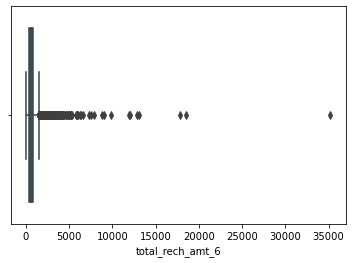

In [471]:
## check the outliers in total rech amount 6
sns.boxplot(telecom['total_rech_amt_6'])

In [472]:
## check the shape of dataframe
telecom.shape

(30001, 156)

In [473]:
## get the 99.9th percentile of the total rech amount
per_99 = telecom['total_rech_amt_6'].quantile(0.999)
telecom[telecom['total_rech_amt_6'] > per_99].shape

(30, 156)

In [474]:
## remove the outlier rows 
telecom=telecom[telecom['total_rech_amt_6'] < per_99]

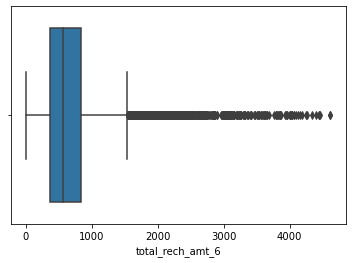

In [475]:
## check the outliers again
sns.boxplot(telecom['total_rech_amt_6'])

In [476]:
# check the shape of the dataframe
telecom.shape

(29971, 156)

In [477]:
## describe the dataframe 
telecom.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99,0.995,0.999])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recency_of_last_rech,recency_of_last_data_rech,Churn
count,2.997100e+04,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.00000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.00000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000,29971.000000

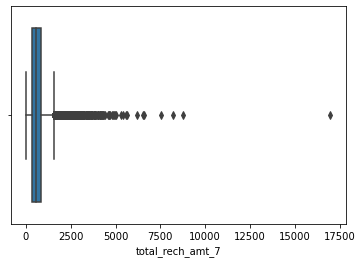

In [478]:
## check the outliers in total rech amount 7
sns.boxplot(telecom['total_rech_amt_7'])

In [479]:
## check the shape of dataframe
telecom.shape

(29971, 156)

In [480]:
## get the 99.9th percentile of the total rech amount
per_99_7 = telecom['total_rech_amt_7'].quantile(0.999)
telecom[telecom['total_rech_amt_7'] > per_99].shape

(18, 156)

In [481]:
## remove the outlier rows 
telecom=telecom[telecom['total_rech_amt_7'] < per_99]

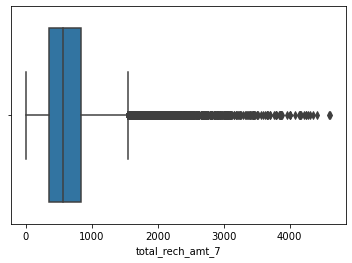

In [482]:
## check the outliers again
sns.boxplot(telecom['total_rech_amt_7'])

In [483]:
# check the shape of the dataframe
telecom.shape

(29953, 156)

In [484]:
## describe the dataframe 
telecom.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99,0.995,0.999])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recency_of_last_rech,recency_of_last_data_rech,Churn
count,2.995300e+04,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29

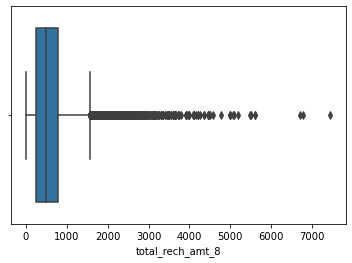

In [485]:
## check the outliers in total rech amount 8
sns.boxplot(telecom['total_rech_amt_8'])

In [486]:
## check the shape of dataframe
telecom.shape

(29953, 156)

In [487]:
## get the 99.9th percentile of the total rech amount
per_99_8 = telecom['total_rech_amt_8'].quantile(0.999)
telecom[telecom['total_rech_amt_8'] > per_99].shape

(14, 156)

In [488]:
## remove the outlier rows 
telecom=telecom[telecom['total_rech_amt_8'] < per_99]

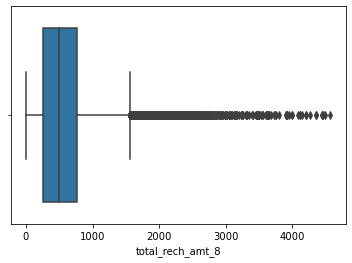

In [489]:
## check the outliers again
sns.boxplot(telecom['total_rech_amt_8'])

In [490]:
# check the shape of the dataframe
telecom.shape

(29939, 156)

In [491]:
## describe the dataframe 
telecom.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99,0.995,0.999])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recency_of_last_rech,recency_of_last_data_rech,Churn
count,2.993900e+04,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.00000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.00000

## Data Visualization

#### Visualize the data and record observations

Text(0.5, 1.0, 'Churn')

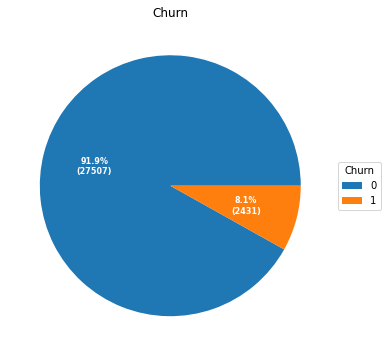

In [492]:
## plot the percentage of Churns vs Non-Churn
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
pf=telecom['Churn'].value_counts()
wedges, texts, autotexts = ax.pie(pf, autopct=lambda pct: func(pct,pf),
                                  textprops=dict(color="w"))

ax.legend(wedges, pf.index,
          title="Churn",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Churn")

8.6% of the 3000 high value customers have churned

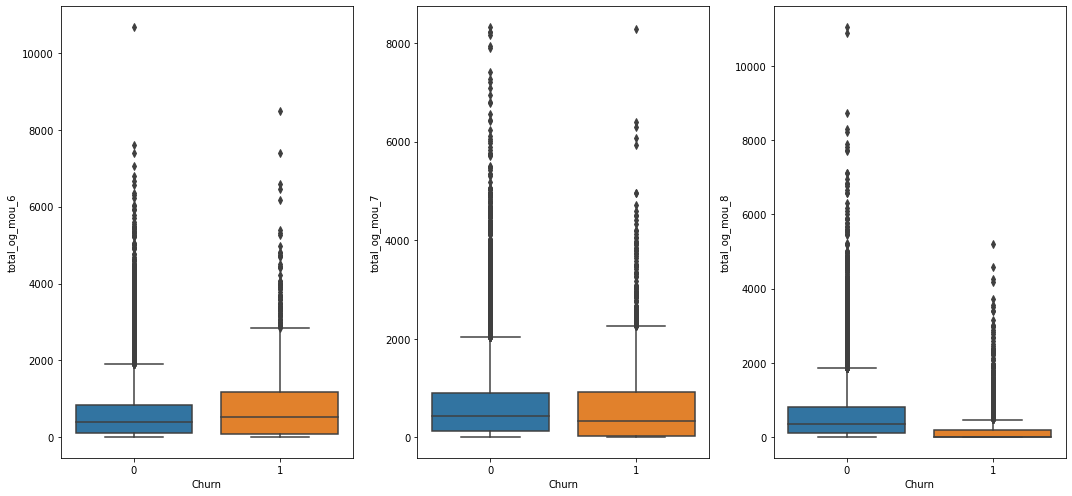

In [493]:
##  check the total outgoing mou 
fig, ax = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(x=telecom['Churn'],y=telecom['total_og_mou_6'],ax=ax[0])
sns.boxplot(x=telecom['Churn'],y=telecom['total_og_mou_7'],ax=ax[1])
sns.boxplot(x=telecom['Churn'],y=telecom['total_og_mou_8'],ax=ax[2])
plt.tight_layout()
plt.show()

**INSIGHT: The outgoing minutes of usage reduced significantly in Month 8 compared to Month 6 and 7 in the customers who have churned. The outgoing minutes of usage in Month 8 is a strong predictor of churn vs non-churn.**

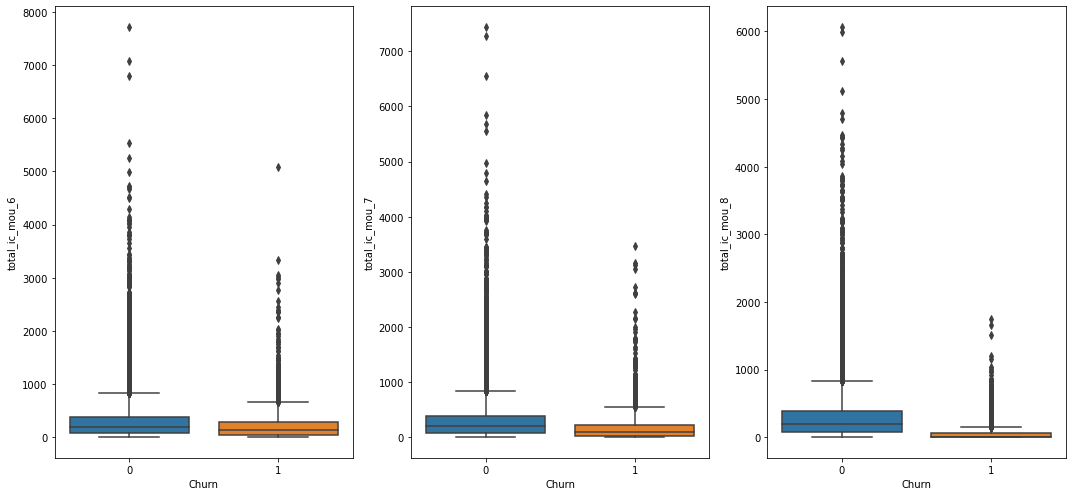

In [494]:
##  check the total outgoing mou 
fig, ax = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(x=telecom['Churn'],y=telecom['total_ic_mou_6'],ax=ax[0])
sns.boxplot(x=telecom['Churn'],y=telecom['total_ic_mou_7'],ax=ax[1])
sns.boxplot(x=telecom['Churn'],y=telecom['total_ic_mou_8'],ax=ax[2])
plt.tight_layout()
plt.show()

**INSIGHT: The incoming minutes of usage reduced in Month 8 compared to Month 6 and 7 in the customers who have churned.  The incoming minutes of usage is a strong predictor of churn vs non-churn.**

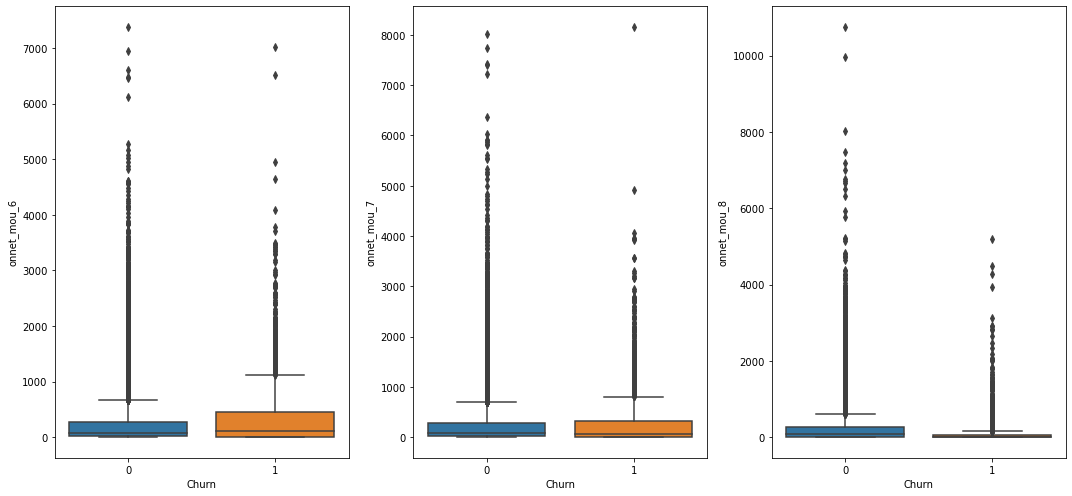

In [495]:
##  check the total onnnet mou
fig, ax = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(x=telecom['Churn'],y=telecom['onnet_mou_6'],ax=ax[0])
sns.boxplot(x=telecom['Churn'],y=telecom['onnet_mou_7'],ax=ax[1])
sns.boxplot(x=telecom['Churn'],y=telecom['onnet_mou_8'],ax=ax[2])
plt.tight_layout()
plt.show()

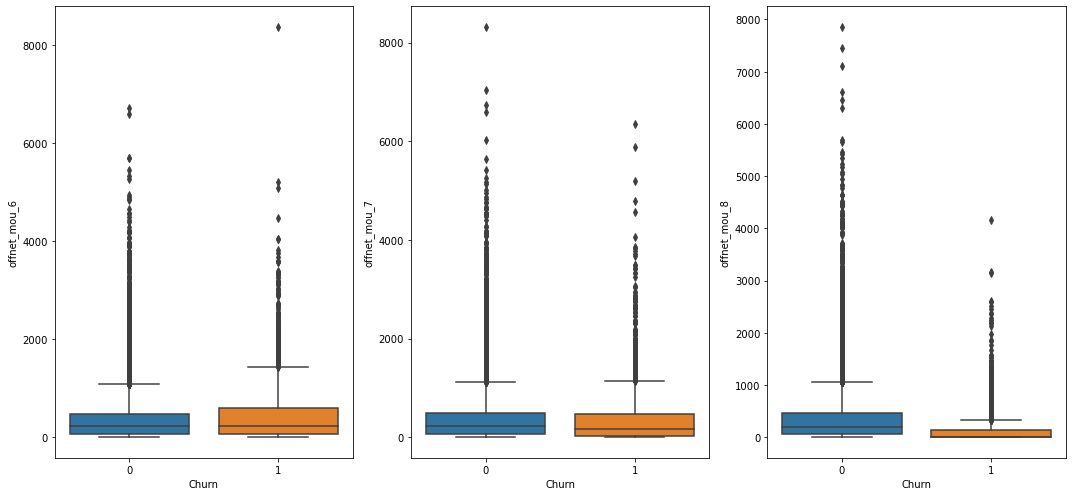

In [496]:
##  check the total offnet mou
fig, ax = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(x=telecom['Churn'],y=telecom['offnet_mou_6'],ax=ax[0])
sns.boxplot(x=telecom['Churn'],y=telecom['offnet_mou_7'],ax=ax[1])
sns.boxplot(x=telecom['Churn'],y=telecom['offnet_mou_8'],ax=ax[2])
plt.tight_layout()
plt.show()

**INSIGHT: The trend of onnnet and offnet minutes of usage are similar to the outgoing and incoming usages indicating a reduction in Month 8 compared to Month 6 and 7.**

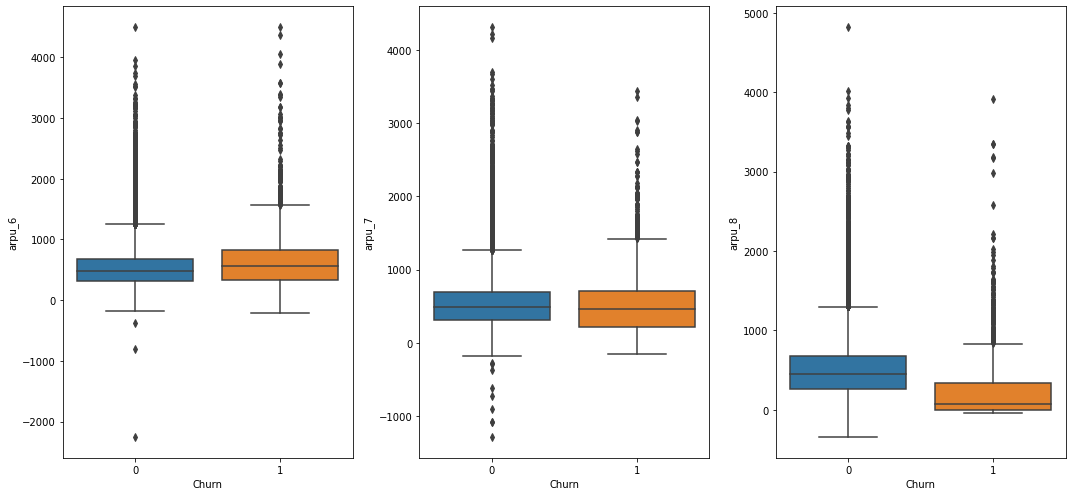

In [497]:
##  check the arpu
fig, ax = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(x=telecom['Churn'],y=telecom['arpu_6'],ax=ax[0])
sns.boxplot(x=telecom['Churn'],y=telecom['arpu_7'],ax=ax[1])
sns.boxplot(x=telecom['Churn'],y=telecom['arpu_8'],ax=ax[2])
plt.tight_layout()
plt.show()

**INSIGHT : The ARPU shows a decreasing trend from Month 6 to Month 8.  The ARPU gap between churn and non-churn customers is not significant in month 6 and 7, but is signficant in Month 8.**   

In [498]:
## function to plot stacked bar charts with annotations
def plot_cat(feature, ax):
    gf = pd.crosstab(index=telecom[feature],columns=telecom['Churn'],values=telecom['onnet_mou_6'],aggfunc='count',normalize='index')
    ax=gf.plot(kind='bar',stacked=True,ax=ax)
    
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The padding is NOT pixels, it's whatever your axis is.
        # So this means pad by half an animal
        padding = 0.1

        # The width of the bar is also not pixels, it's the
        # number of animals. So we can use it as the label!
        label_text = "{:.0f}%".format(height*100)

        # ax.text(x, y, text)
        label_x = x + width - padding
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='right', va='center')


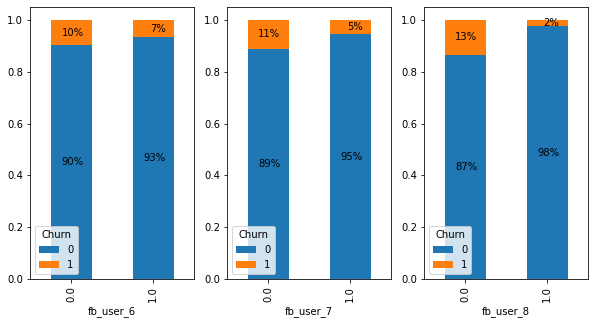

In [499]:
## plot the % of churn and non-churn for fb_user for all the 3 months
fig, ax = plt.subplots(1,3,figsize=(10,5))
plot_cat('fb_user_6',ax[0])
plot_cat('fb_user_7',ax[1])
plot_cat('fb_user_8',ax[2])

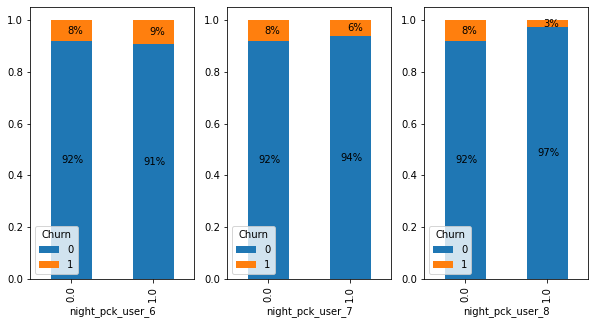

In [500]:
## plot the % of churn and non-churn for night_pack_users for all the 3 months
fig, ax = plt.subplots(1,3,figsize=(10,5))
plot_cat('night_pck_user_6',ax[0])
plot_cat('night_pck_user_7',ax[1])
plot_cat('night_pck_user_8',ax[2])

In [501]:
## check the telecom columns
telecom.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'recency_of_last_rech',
       'recency_of_last_data_rech', 'Churn'],
      dtype='object', length=156)

Text(0.5, 1.0, 'August')

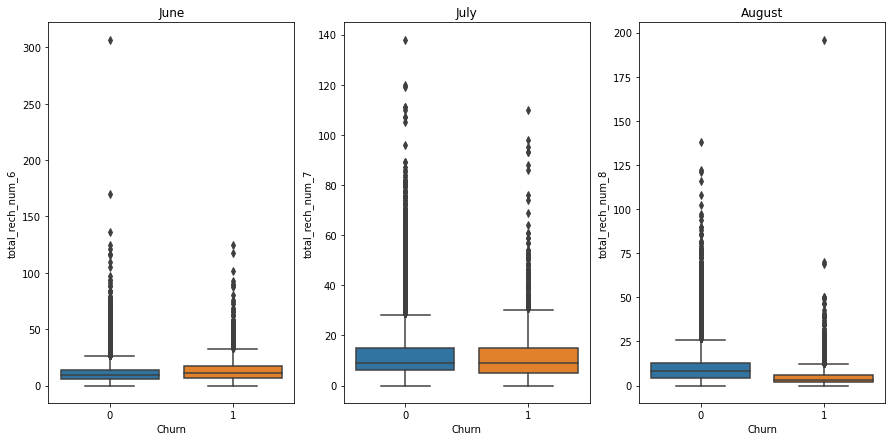

In [502]:
# check the distribution of the total recharge count for months 6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,7))
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_num_6'], ax=ax[0])
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_num_7'], ax=ax[1])
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_num_8'], ax=ax[2])
ax[0].set_title("June")
ax[1].set_title("July")
ax[2].set_title("August")

##### Insight: From the above boxplot, we can see that subscribers who have churned has rechared less in the month of August as compared to those who have not churned in the same month

Text(0.5, 1.0, 'August-Total Recharge Amount')

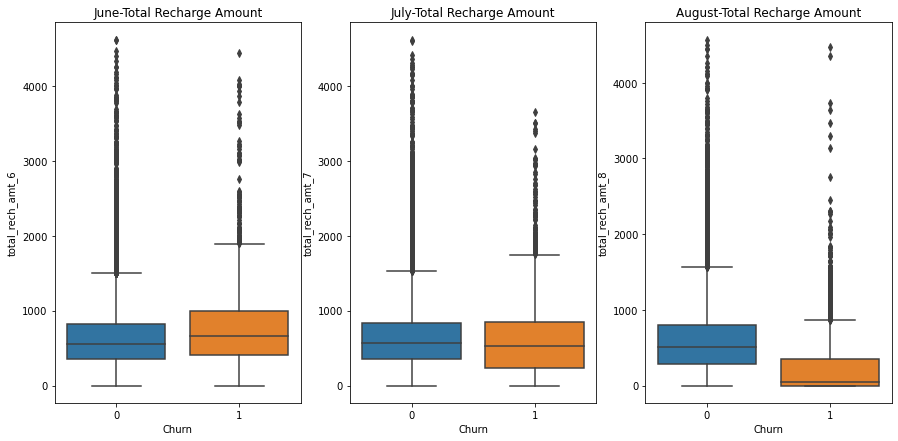

In [503]:
# check the distribution of the total recharge amount for months 6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,7))
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_amt_6'], ax=ax[0])
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_amt_7'], ax=ax[1])
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_amt_8'], ax=ax[2])
ax[0].set_title("June-Total Recharge Amount")
ax[1].set_title("July-Total Recharge Amount")
ax[2].set_title("August-Total Recharge Amount")

#### Insight: Median recharge amount is much less for those subscribers who have churtned as compred to those who have not churned for the month of August

Text(0.5, 1.0, 'August-Last_day_Recharge_Amount')

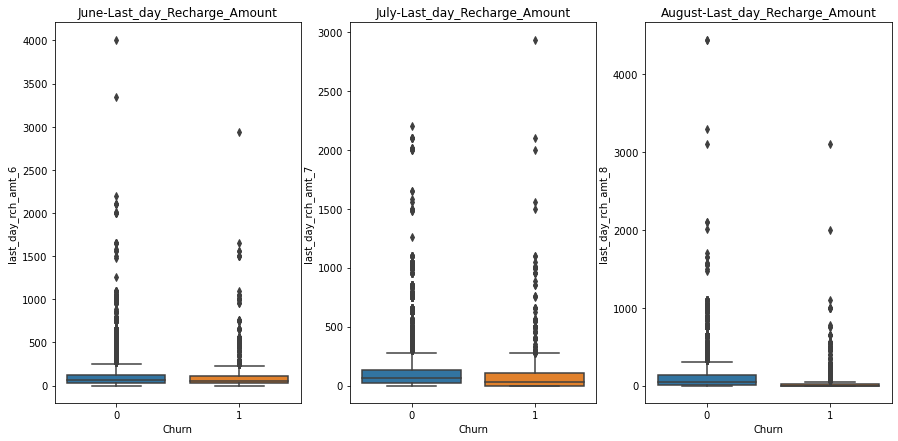

In [504]:
# check the distribution of the "last day recharge amount" for the month of  6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,7))
sns.boxplot(x = telecom['Churn'], y = telecom['last_day_rch_amt_6'], ax=ax[0])
sns.boxplot(x = telecom['Churn'], y = telecom['last_day_rch_amt_7'], ax=ax[1])
sns.boxplot(x = telecom['Churn'], y = telecom['last_day_rch_amt_8'], ax=ax[2])
ax[0].set_title("June-Last_day_Recharge_Amount")
ax[1].set_title("July-Last_day_Recharge_Amount")
ax[2].set_title("August-Last_day_Recharge_Amount")

Text(0.5, 1.0, 'August-total_rech_data')

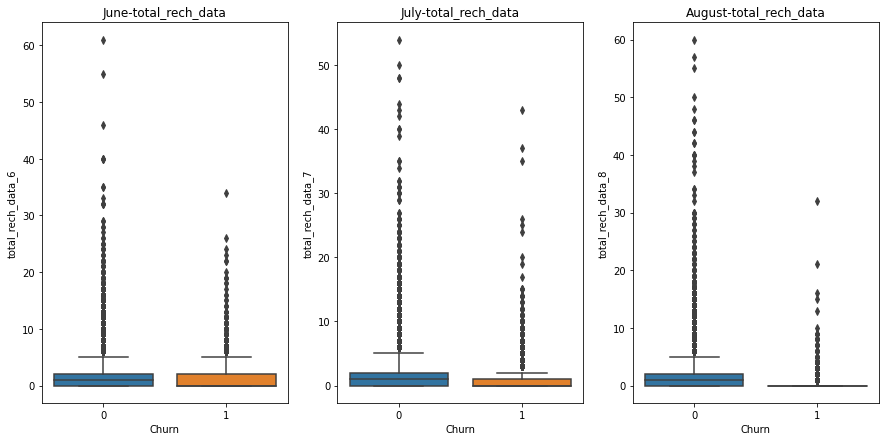

In [505]:
# check the distribution of the "Total number of recharge data" for the month of  6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,7))
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_data_6'], ax=ax[0])
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_data_7'], ax=ax[1])
sns.boxplot(x = telecom['Churn'], y = telecom['total_rech_data_8'], ax=ax[2])
ax[0].set_title("June-total_rech_data")
ax[1].set_title("July-total_rech_data")
ax[2].set_title("August-total_rech_data")


Text(0.5, 1.0, 'count_rech_2g')

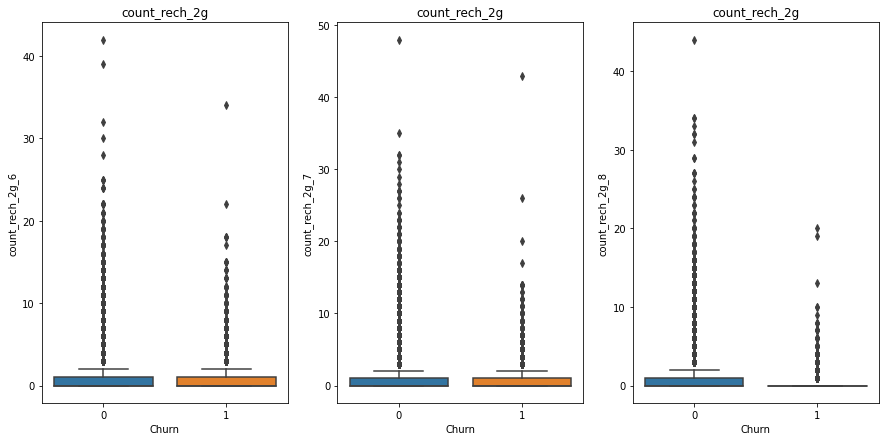

In [506]:
# check the distribution of the "Count of Recharge in 2g and 3g" for the month of  6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,7))
sns.boxplot(x = telecom['Churn'], y = telecom['count_rech_2g_6'], ax=ax[0])
sns.boxplot(x = telecom['Churn'], y = telecom['count_rech_2g_7'], ax=ax[1])
sns.boxplot(x = telecom['Churn'], y = telecom['count_rech_2g_8'], ax=ax[2])
ax[0].set_title("count_rech_2g")
ax[1].set_title("count_rech_2g")
ax[2].set_title("count_rech_2g")

Text(0.5, 1.0, 'August-count_rech_3g')

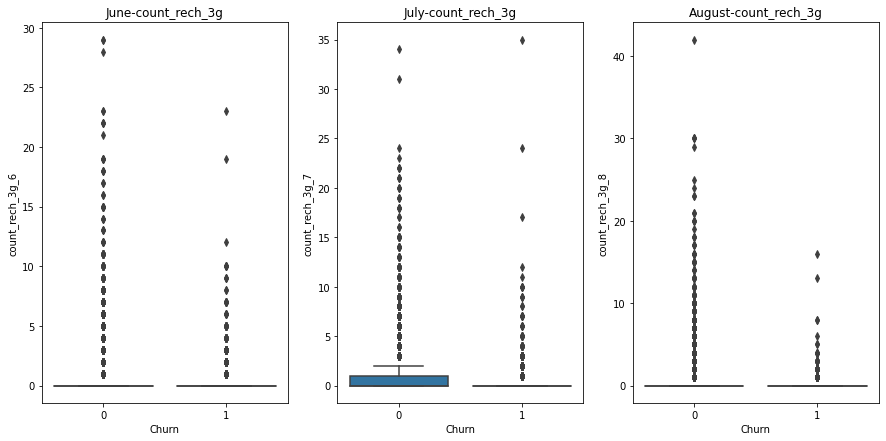

In [507]:
# check the distribution of the "Count of Recharge in 2g and 3g" for the month of  6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,7))
sns.boxplot(x = telecom['Churn'], y = telecom['count_rech_3g_6'], ax=ax[0])
sns.boxplot(x = telecom['Churn'], y = telecom['count_rech_3g_7'], ax=ax[1])
sns.boxplot(x = telecom['Churn'], y = telecom['count_rech_3g_8'], ax=ax[2])
ax[0].set_title("June-count_rech_3g")
ax[1].set_title("July-count_rech_3g")
ax[2].set_title("August-count_rech_3g")

Text(0.5, 1.0, 'August-vol_2g_mb_8')

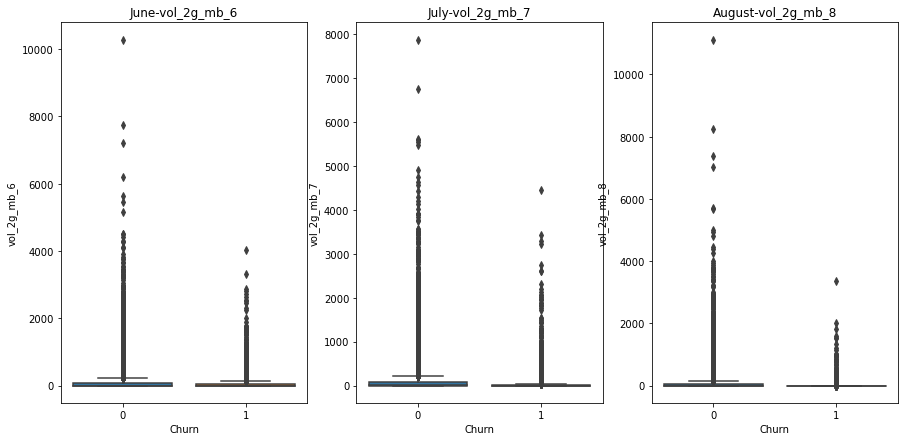

In [508]:
# check the distribution of the "Internet usage Volume" for the month of  6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,7))
sns.boxplot(x = telecom['Churn'], y = telecom['vol_2g_mb_6'], ax=ax[0])
sns.boxplot(x = telecom['Churn'], y = telecom['vol_2g_mb_7'], ax=ax[1])
sns.boxplot(x = telecom['Churn'], y = telecom['vol_2g_mb_8'], ax=ax[2])
ax[0].set_title("June-vol_2g_mb_6")
ax[1].set_title("July-vol_2g_mb_7")
ax[2].set_title("August-vol_2g_mb_8")

Text(0.5, 1.0, 'August-monthly_2g')

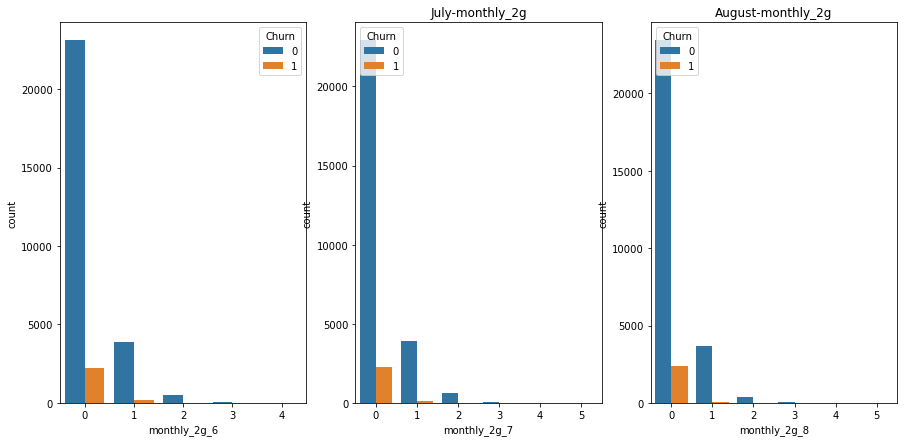

In [509]:
# check the distribution of the "Monthly validation scheme" for the month of  6, 7 and 8
fig, ax = plt.subplots(1,3,figsize =(15,7))
sns.countplot(x= 'monthly_2g_6',hue = 'Churn', data = telecom, ax=ax[0])
sns.countplot(x= 'monthly_2g_7',hue = 'Churn', data = telecom, ax=ax[1])
sns.countplot(x= 'monthly_2g_8',hue = 'Churn', data = telecom, ax=ax[2])
ax[1].set_title("July-monthly_2g")
ax[2].set_title("August-monthly_2g")

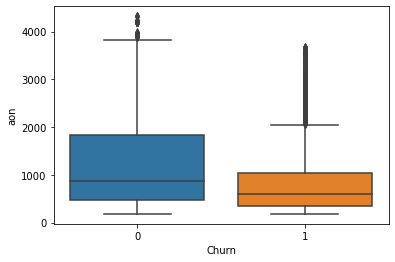

In [510]:
# Check the distribution of the variable "Aon" - Age of network
sns.boxplot(x = telecom['Churn'], y = telecom['aon'])

#### Insight: Subscribers who have churned have tenure much less in the network as compred to the Subscribers who have not churned

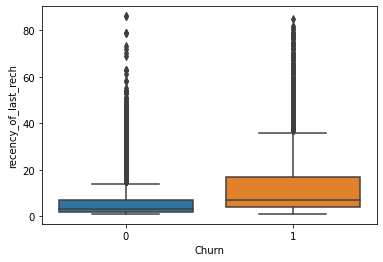

In [511]:
# Check the distribution of the derived variable "Recency_of_last_recharge"
sns.boxplot(x = telecom['Churn'], y = telecom['recency_of_last_rech'])

#### Insight: Recency of the last recharge is much higher for the subscribers who have churned as compred to the subcribers who have not churned

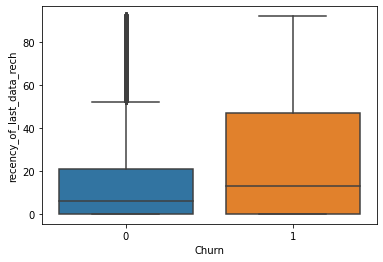

In [512]:
# Check the distribution of the derived variable "Recency_of_last_data_Recharge"
sns.boxplot(x = telecom['Churn'], y = telecom['recency_of_last_data_rech'])

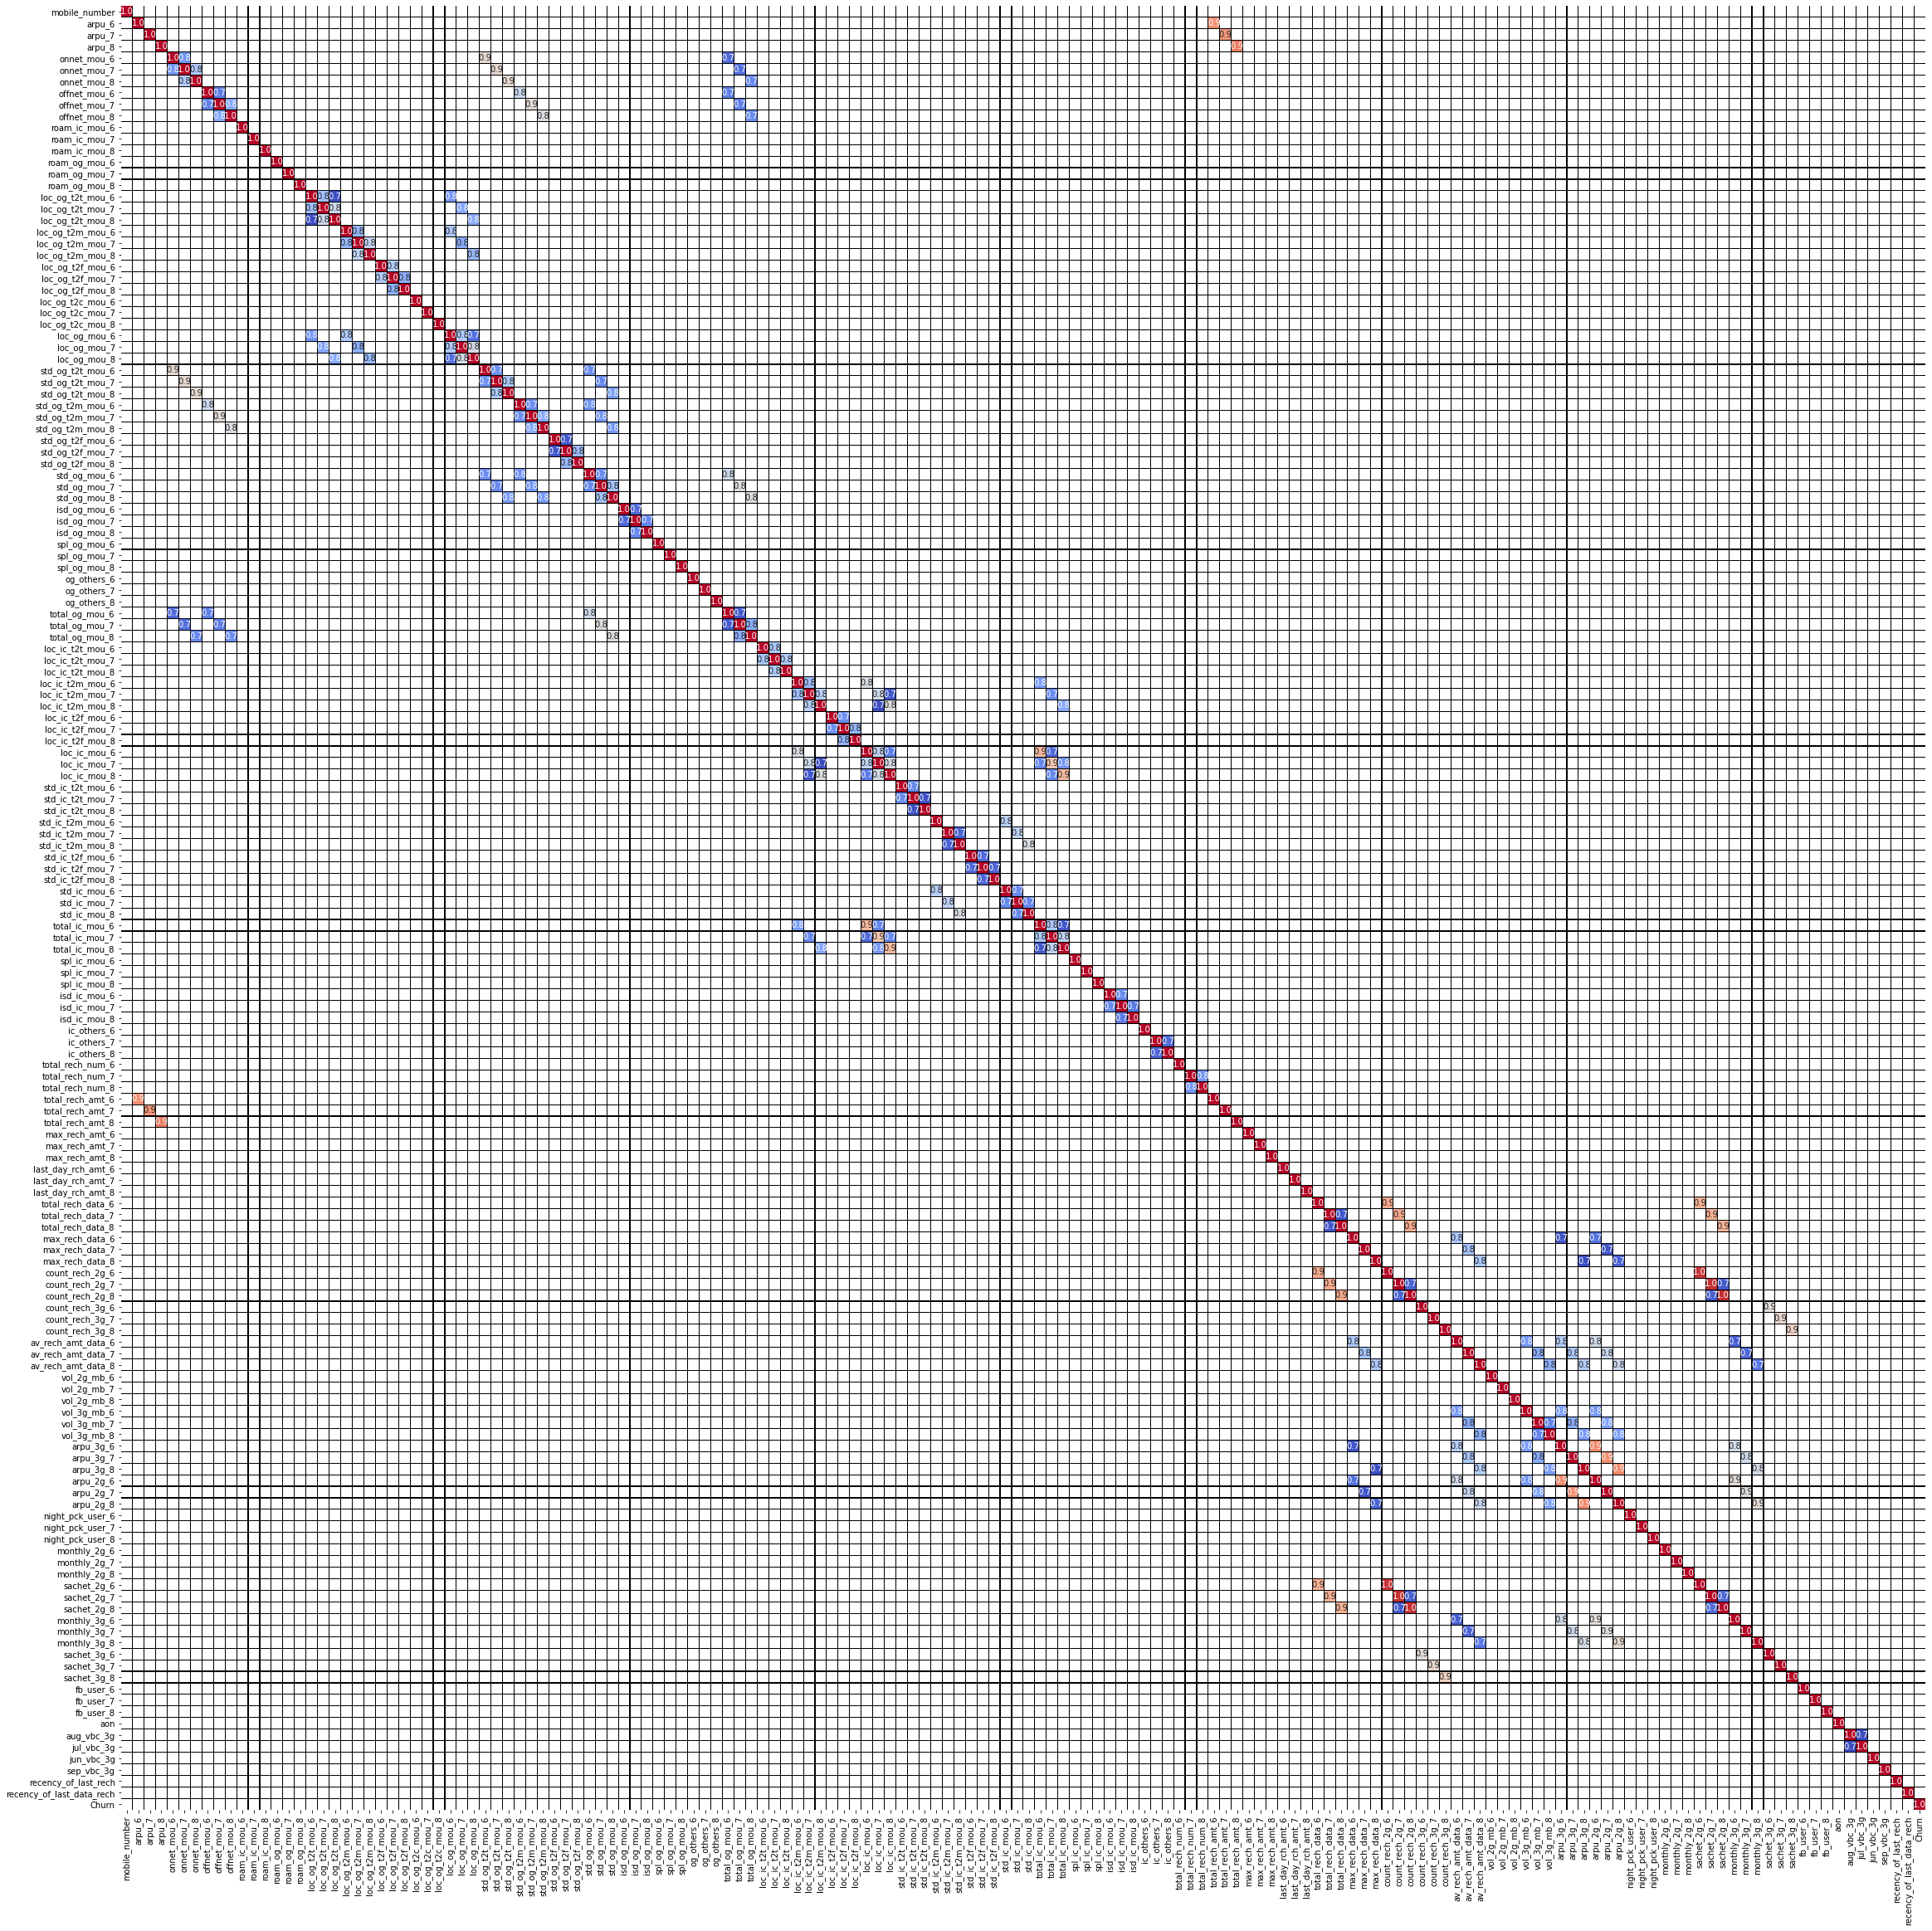

In [513]:
## Plot the correlation matrix 

## set the figsize to higher for more readability
plt.figure(figsize=(40,40))

## create the correation matrix
telecom_corr = telecom.corr()

## create a mask array to mask all correlations less than 0.9 
array_1 = telecom_corr.to_numpy()
mask = (array_1 < 0.7) & (array_1 > -0.7)
mask = mask.astype(int)

## plot the heatmap only for the correlations > 0.9. Making the annotation as 2 digit 
p = sns.heatmap(telecom_corr,
                cmap='coolwarm',
                annot=True,
                linewidths=0.1,
                linecolor='black',
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                square=True,
                xticklabels=True,
                yticklabels=True,
                mask=mask)

In [514]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [515]:
vif = pd.DataFrame()
vif['Features'] = telecom.columns
vif['vif'] =  [variance_inflation_factor(telecom.values,i) for i in range(telecom.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif= vif.sort_values('vif',ascending=False)
vif

C:\Users\Sriram\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,vif
104,total_rech_data_7,inf
141,monthly_3g_8,inf
136,sachet_2g_6,inf
137,sachet_2g_7,inf
138,sachet_2g_8,inf
103,total_rech_data_6,inf
135,monthly_2g_8,inf
134,monthly_2g_7,inf
133,monthly_2g_6,inf
114,count_rech_3g_8,inf


## Data preprocessing

#### Split the data into Train and Test and Scale the data

In [516]:
## split the data into train and test datsets.  As there is a class imbalance between Churn and Non-Churn classes in the dataset,
## with Churn being only 8.6% of the dataset, ensure that there is good split of the Churn rows between both the train and
## test datasets

X =  telecom.drop(columns='Churn')
y = telecom['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42,stratify=y)

In [517]:
##  check the shape of X_train
X_train.shape

(20957, 155)

In [518]:
## check the shape of X_test
X_test.shape

(8982, 155)

In [519]:
## check the percentage of Churn in the train. it should be close to 8.6%
y_train.value_counts()/y_train.shape[0]*100

0    91.878609
1     8.121391
Name: Churn, dtype: float64

In [520]:
## check the percentage of Churn in the test. it should be close to 8.6%
y_test.value_counts()/y_test.shape[0]*100

0    91.883768
1     8.116232
Name: Churn, dtype: float64

In [521]:
## Save the mobile numbers in the X_train in a dataframe for future use and remove from X_train
X_train_mobile_num = X_train['mobile_number']
X_train = X_train.drop(columns='mobile_number')

In [522]:
## Save the mobile numbers in the X_test in a dataframe for future use and remove from X_test
X_test_mobile_num = X_test['mobile_number']
X_test = X_test.drop(columns='mobile_number')

In [523]:
## scale the columns in the X_train and X_test
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc =  scaler.transform(X_test)

In [524]:
## check the scaling done in X_train
X_train_sc

array([[-1.14510501, -0.14576616,  0.05741187, ..., -0.16079895,
        -0.65786786, -0.69019085],
       [-0.03586894, -0.20060691, -0.72484753, ..., -0.16079895,
         2.5921125 , -0.74023177],
       [-0.3719649 ,  0.83423606,  2.76871554, ..., -0.16079895,
        -0.65786786,  2.61251026],
       ...,
       [ 0.70326793,  0.04496482, -0.43866478, ..., -0.16079895,
         0.38212586,  0.5608323 ],
       [-0.23543841,  0.32296486,  0.43316257, ..., -0.16079895,
        -0.39786943, -0.03965881],
       [-0.59483235,  0.82793648,  0.91660989, ..., -0.16079895,
        -0.137871  , -0.18978159]])

In [525]:
## check the scaling done in X_test
X_test_sc

array([[ 0.33859019,  0.10755275, -0.02831474, ..., -0.16079895,
        -0.65786786, -0.13974066],
       [-1.33555753,  0.601866  ,  0.12063323, ..., -0.16079895,
         0.12212743, -0.74023177],
       [-0.02327358,  0.06438608,  0.34470993, ..., -0.16079895,
         0.12212743, -0.74023177],
       ...,
       [-0.49718522, -0.48224595, -0.07621808, ..., -0.16079895,
        -0.65786786, -0.69019085],
       [-0.1545851 , -0.67619737, -0.8204426 , ..., -0.16079895,
        -0.65786786, -0.69019085],
       [-0.58149842, -0.80045882, -0.507027  , ..., -0.16079895,
         0.25212664,  0.760996  ]])

## Class Imbalance treatment

#### Handle class imbalance using SMOTE

In [526]:
## Run smote with the best parameters
##sm = SMOTE(random_state=101, k_neighbors=1, sampling_strategy=0.75)
sm = SMOTE(random_state=101,sampling_strategy=0.35)
X_train_sc, y_train = sm.fit_sample(X_train_sc, y_train)

In [527]:
## Check the shape of the x_train after applying smote
X_train_sc.shape

(25994, 154)

In [528]:
## Check the shape of the x_train after applying smote
y_train.shape

(25994,)

In [529]:
## check the percentage of Churn in the train.
y_train.value_counts()/y_train.shape[0]*100

0    74.074786
1    25.925214
Name: Churn, dtype: float64

### SMOTE has over-sampled and increased the minority classes to 25%

### Selected a ratio of 75:25 for Non-Event vs Event classes to create a training dataset which is closer to the real scenario data

In [530]:
## create dataframes for X_train and X_test
X_train_df =  pd.DataFrame(X_train_sc,columns=X_train.columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test_sc,columns=X_test.columns).reset_index(drop=True)
y_train_df =  pd.DataFrame(y_train,columns=['Churn']).reset_index(drop=True)
y_test_df =  pd.DataFrame(y_test,columns=['Churn']).reset_index(drop=True)

In [531]:
## join the X_train and y _train and X_test and y_test
train = pd.concat([X_train_df,y_train_df],axis=1)

In [532]:
## concat the X_test and Y_test
test =  pd.concat([X_test_df,y_test_df],axis=1)

In [533]:
## write train dataframe to train csv
train.to_csv('telecom_train.csv',index=False)

In [534]:
## write test dataframe to test csv
test.to_csv('telecom_test.csv',index=False)

### PCA on the train and test dataset

#### Perform PCA on the Train and Test data sets

In [535]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [536]:
## set pandas options to display all rows and columns during display
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [537]:
# Load the train dataset
telecom_train = pd.read_csv("telecom_train.csv")

In [538]:
## display the shape
telecom_train.shape

(25994, 155)

In [539]:
# Separate the Dependent and Independent variables in train dataset
y_train = telecom_train.pop('Churn')
X_train = telecom_train

In [540]:
## display the head
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [541]:
## display the head
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recency_of_last_rech,recency_of_last_data_rech
0,-1.145105,-0.145766,0.057412,-0.460970,0.236925,0.584479,-0.743207,-0.614190,-0.600321,-0.200697,-0.163612,-0.164266,-0.165067,-0.210843,-0.184911,-0.363895,-0.334567,-0.336889,-0.609902,-0.432065,-0.543799,-0.285102,-0.285723,-0.299285,-0.241301,-0.200749,-0.23433,-0.643437,-0.510176,-0.577275,-0.308448,0.483428,0.884056,-0.425557,-0.438028,-0.380062,-0.156554,-0.143208,-0.146925,-0.492387,0.026737,0.338415,-0.086565,-0.089369,-0.07655,-0.237262,1.034635,1.545608,-0.142195,-0.017385,-0.017507,-0.797340,-0.219058,0.035162,-0.407486,-0.234181,-0.352255,-0.575558,-0.220179,-0.479388,-0.334609,-0.334088,-0.341030,-0.658221,-0.324258,-0.561753,-0.184784,-0.174588,-0.131731,-0.294738,-0.252223,-0.270337,-0.138705,-0.14932,-0.128208,-0.332693,-0.295810,-0.287193,-0.727132,-0.425878,-0.622774,-0.300986,-0.099231,-0.23461,-0.159019,-0.148197,-0.153027,-0.077379,-0.087536,-0.090574,-0.725465,0.882853,1.518393,-1.140334,-0.150452,0.052707,-0.739008,-0.702279,-0.665779,-0.556668,-0.509970,-0.492314,-0.586577,1.656014,2.148570,-0.696483,-0.289307,-0.429304,-0.495155,2.053013,2.687457,-0.361927,-0.34782,-0.324004,-0.679273,0.385391,0.329074,-0.379530,1.800637,1.874549,-0.397735,-0.408157,-0.387914,-0.386587,-0.378713,-0.368788,-0.411774,-0.222568,-0.032398,-0.116158,-0.112951,-0.10441,-0.400899,-0.407044,-0.379101,-0.424754,2.111579,2.751630,-0.359056,-0.3501,-0.343749,-0.209124,-0.203575,-0.18287,-1.029101,0.958351,1.051574,-0.520898,-0.403244,-0.401742,-0.379084,-0.160799,-0.657868,-0.690191
1,-0.035869,-0.200607,-0.724848,-0.266717,-0.122514,-0.384943,1.483113,1.033589,-0.378489,-0.212806,-0.163612,-0.164266,-0.229684,-0.210843,-0.184911,-0.153718,-0.154069,-0.183276,0.569703,0.423325,-0.477781,-0.285102,-0.285723,-0.299285,-0.241301,-0.200749

In [542]:
# Load the test dataset
telecom_test = pd.read_csv("telecom_test.csv")

In [543]:
## display the head
telecom_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recency_of_last_rech,recency_of_last_data_rech,Churn
0,0.338590,0.107553,-0.028315,-0.413728,-0.379420,-0.232278,0.332936,0.165906,-0.193673,-0.212806,-0.163612,0.151220,-0.229684,-0.210843,0.151172,-0.152215,-0.007208,0.101653,0.203893,0.076360,-0.176369,-0.257023,-0.027009,0.069706,-0.241301,-0.200749,-0.234330,0.024984,0.042277,-0.044570,-0.359488,-0.411993,-0.332542,0.327980,0.193461,-0.143223,0.209613,-0.143208,-0.146925,-0.016844,-0.147902,-0.317708,-0.086565,-0.089369,-0.07655,-0.350851,-0.340260,-0.326219,-0.142195,-0.017385,-0.017507,-0.012874,-0.120954,-0.311330,-0.043875,0.208436,0.444582,0.182277,0.214485,0.108281,-0.034859,0.407443,0.571063,0.099793,0.318376,0.378677,0.113394,-0.179957,-0.066353,1.196837,1.026212,0.988600,0.697022,0.18907,0.610490,0.998037,0.640835,0.775565,0.438793,0.488649,0.582052,-0.300986,-0.099231,-0.23461,-0.159019,-0.148197,-0.153027,-0.077379,-0.087536,-0.090574,-0.512856,-0.393745,-0.756940,-0.177218,0.252713,-0.154782,0.197103,0.770054,0.880710,0.372056,0.740459,0.829770,0.120602,0.049535,-0.206095,0.610148,0.585617,0.175599,-0.495155,-0.510004,-0.477068,1.351013,1.188054,0.472775,0.567562,0.483824,-0.155684,-0.331126,-0.346920,-0.308736,-0.012229,0.469093,0.019798,0.906427,0.839969,0.094884,0.917612,0.849809,0.136253,-0.116158,-0.112951,-0.10441,-0.400899,-0.407044,-0.379101,-0.424754,-0.441217,-0.416196,1.307921,1.207327,-0.343749,0.800229,0.688776,0.739933,0.971722,0.958351,1.051574,-0.583401,-0.077569,-0.096643,-0.073132,-0.160799,-0.657868,-0.139741,0
1,-1.335558,0.601866,0.120633,-0.522470,-0.280903,-0.360760,-0.689205,1.967580,1.067717,-0.153500,-0.163612,-0.074402,-0.229684,-0.210843,0.069821,-0.356384,-0.136020,-0.150915,-0.595213,-0.305052,-0.335053,-0.285102,-0.285723,-0.299285,-0.241301,-0.200749,-0.234330,-0.629123,-0.299813,-0.

In [544]:
# Separate the dependent and Independent variables
y_test = telecom_test.pop('Churn')
X_test = telecom_test

In [545]:
## display the head
y_test.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [546]:
## display the head
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recency_of_last_rech,recency_of_last_data_rech
0,0.338590,0.107553,-0.028315,-0.413728,-0.379420,-0.232278,0.332936,0.165906,-0.193673,-0.212806,-0.163612,0.151220,-0.229684,-0.210843,0.151172,-0.152215,-0.007208,0.101653,0.203893,0.076360,-0.176369,-0.257023,-0.027009,0.069706,-0.241301,-0.200749,-0.234330,0.024984,0.042277,-0.044570,-0.359488,-0.411993,-0.332542,0.327980,0.193461,-0.143223,0.209613,-0.143208,-0.146925,-0.016844,-0.147902,-0.317708,-0.086565,-0.089369,-0.07655,-0.350851,-0.340260,-0.326219,-0.142195,-0.017385,-0.017507,-0.012874,-0.120954,-0.311330,-0.043875,0.208436,0.444582,0.182277,0.214485,0.108281,-0.034859,0.407443,0.571063,0.099793,0.318376,0.378677,0.113394,-0.179957,-0.066353,1.196837,1.026212,0.988600,0.697022,0.18907,0.610490,0.998037,0.640835,0.775565,0.438793,0.488649,0.582052,-0.300986,-0.099231,-0.23461,-0.159019,-0.148197,-0.153027,-0.077379,-0.087536,-0.090574,-0.512856,-0.393745,-0.756940,-0.177218,0.252713,-0.154782,0.197103,0.770054,0.880710,0.372056,0.740459,0.829770,0.120602,0.049535,-0.206095,0.610148,0.585617,0.175599,-0.495155,-0.510004,-0.477068,1.351013,1.188054,0.472775,0.567562,0.483824,-0.155684,-0.331126,-0.346920,-0.308736,-0.012229,0.469093,0.019798,0.906427,0.839969,0.094884,0.917612,0.849809,0.136253,-0.116158,-0.112951,-0.10441,-0.400899,-0.407044,-0.379101,-0.424754,-0.441217,-0.416196,1.307921,1.207327,-0.343749,0.800229,0.688776,0.739933,0.971722,0.958351,1.051574,-0.583401,-0.077569,-0.096643,-0.073132,-0.160799,-0.657868,-0.139741
1,-1.335558,0.601866,0.120633,-0.522470,-0.280903,-0.360760,-0.689205,1.967580,1.067717,-0.153500,-0.163612,-0.074402,-0.229684,-0.210843,0.069821,-0.356384,-0.136020,-0.150915,-0.595213,-0.305052,-0.335053,-0.285102,-0.285723,-0.299285,-0.241301,-0.200749,-0.234330,-0.629123,-0.299813,-0.326138,-

In [547]:
## display the shape
telecom_test.shape

(8982, 154)

In [548]:
# Import the PCA library
from sklearn.decomposition import PCA

In [549]:
## Create a PCA object to capture 90% of the variance
pca = PCA(0.9)

In [550]:
##  perform fit on PCA
pca.fit(X_train)

PCA(n_components=0.9)

### Components from PCA

In [551]:
## display the PCA components
pca.components_

array([[-0.0827043 , -0.08230179, -0.05200134, ...,  0.02658222,
         0.02761871,  0.04118561],
       [ 0.14160369,  0.17860104,  0.19231142, ...,  0.02664256,
        -0.06085095, -0.04007985],
       [-0.07863522, -0.10095216, -0.0681502 , ..., -0.00551065,
         0.03215924,  0.03103164],
       ...,
       [-0.16800602, -0.13344451, -0.09118527, ...,  0.10249771,
        -0.00429412,  0.17709897],
       [-0.08168357, -0.01021861, -0.0333968 , ...,  0.04029778,
        -0.01072485,  0.09527266],
       [ 0.17034639,  0.19863014,  0.15283142, ..., -0.08872596,
        -0.08387017,  0.29511627]])

In [552]:
# Look the variance ratio for each components
pca.explained_variance_ratio_

array([0.11242124, 0.09482394, 0.0626564 , 0.05156357, 0.03478729,
       0.03167924, 0.02952918, 0.02836258, 0.02350092, 0.02331858,
       0.02023542, 0.01840286, 0.01783342, 0.01766387, 0.01643041,
       0.01604342, 0.01582202, 0.01446599, 0.01423137, 0.01390514,
       0.01254607, 0.01155441, 0.01109729, 0.01094765, 0.00995907,
       0.00969531, 0.00940705, 0.00907876, 0.0088156 , 0.00843881,
       0.00835052, 0.00778537, 0.00756781, 0.00706269, 0.00667066,
       0.00645496, 0.00633213, 0.00629465, 0.00601825, 0.00599936,
       0.00586196, 0.00560522, 0.00542604, 0.0053582 , 0.00519112,
       0.00512011, 0.00500617, 0.00476157, 0.00453543, 0.00447896,
       0.00442392, 0.00427853, 0.00386487, 0.00382279, 0.00378806,
       0.00362838])

In [553]:
# Making the scree plot for the explained variance
var_cum = np.cumsum(pca.explained_variance_ratio_)

In [554]:
## get the number of PCA components for the selected variance
len(pca.explained_variance_ratio_)

56

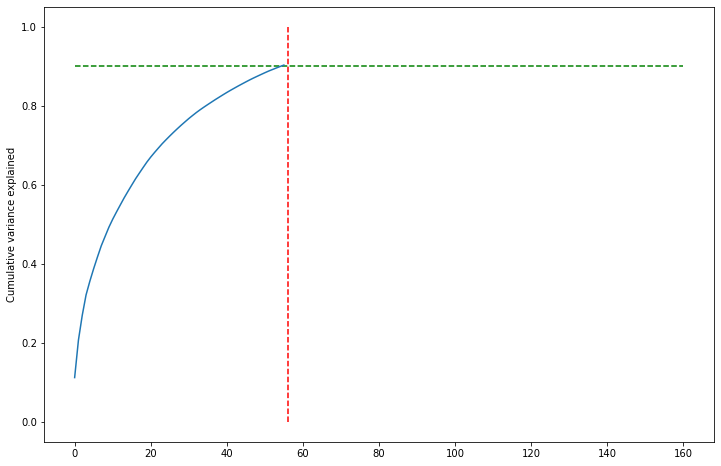

In [555]:
# plot the variance
fig = plt.figure(figsize=[12,8])
plt.vlines(x=56, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

### Perform PCA with 56 components

In [556]:
## import required libraries
from sklearn.decomposition import IncrementalPCA

In [557]:
## Create PCA object with 56 components
pca_final = IncrementalPCA(n_components = 56)

In [558]:
# Fit and transform PCA on  the train dataset
telecom_train_pca = pca_final.fit_transform(X_train)

In [559]:
##  check the shape
telecom_train_pca.shape

(25994, 56)

In [560]:
## create the column names for the PCA components
cols = ['PC'+str(i) for i in range(1,57)]

In [561]:
## concatenate the X_train PCA components with the y_train
df_telecom_train_pca = pd.concat([pd.DataFrame(telecom_train_pca,columns= cols),y_train],axis = 1)

In [562]:
## display the head
df_telecom_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,Churn
0,0.963128,-3.126614,0.533003,4.418050,-0.049804,1.891909,-2.711178,-1.282563,0.902935,-0.517044,-0.347122,-0.868482,1.200590,-0.673377,-0.412036,0.136609,-0.264146,0.533837,-0.255125,0.223425,-0.545653,0.194043,-0.678401,-0.417886,-2.036406,0.449158,2.300808,-0.098274,1.198544,0.608713,0.226914,1.668058,-0.603477,0.140329,-0.272589,0.029760,-0.209414,0.409364,-0.122754,0.322985,-0.387862,0.874380,-0.301052,-1.105838,-0.014097,0.260341,-0.584917,0.273240,0.682276,-0.229704,0.778518,-1.019523,-0.041609,0.306749,0.267306,0.234332,0
1,-2.851665,-1.255744,0.003627,-1.905944,-0.736228,-0.248357,2.344332,-0.532045,-0.068287,-0.116541,0.553592,-0.742094,-0.283669,-0.779647,0.430524,-0.500036,0.074601,0.749362,-0.907420,-0.032537,-0.567424,0.026477,0.067218,0.483636,0.992899,0.298829,0.782277,-0.225126,0.286711,0.517857,0.121585,-0.097604,0.041891,0.734049,-0.055674,-0.604828,-0.642397,0.178477,0.466768,0.237459,0.294694,0.147829,-0.111786,-0.158163,0.092287,0.468402,-0.847132,0.796040,-0.125783,0.531641,0.057185,0.021569,-0.006609,0.053293,-0.643971,0.098239,1
2,-2.956523,4.008696,-1.271745,0.778335,7.653701,0.367130,-1.368928,-0.030679,0.944675,-1.977910,3.670744,2.846020,-1.491191,3.178965,-2.769529,0.011650,1.923208,1.108410,1.155269,-2.096936,-0.179893,-1.593953,2.135635,-5.044507,0.100272,0.017227,-1.455702,1.037130,-0.640014,-0.027817,-0.576721,-0.035035,0.780200,-0.367952,-0.635055,1.648696,-0.380565,-0.448041,3.061876,0.568690,-0.722234,0.702897,-0.440375,0.060325,1.440436,0.089790,1.152534,1.485327,-0.339674,-0.022982,0.655784,-0.299227,0.106774,0.249778,1.790166,-0.169124,0
3,0.820277,-3.120560,-0.478094,-0.878022,-0.164362,-0.617459,0.486017,-0.647860,-0.789375,-0.060455,0.255413,0.177660,-0.149178,-0.469677,0.446486,-0.210552,0.706343,0.466966,-0.165065,1.620201,0.252336,-0.043896,0.036342,0.012504,0.339130,-0.678995,-0.143567,-0.056047,-0.163766,-0.698674,-0.027701,0.278553,-0.249093,-0.805799,-0.189018,0.477662,0.148082,0.218246,-0.367724,0.012894,0.067205,0.413668,-0.351418,-0.822445,0.906167,-0.336803,-0.185875,-0.272413,-0.566370,-0.233042,0.223400,0.047094,-0.991086,1.139022,-0.242458,0.053347,0
4,-4.376142,-0.387648,1.565615,-0.348814,-1.879902,-2.932830,-0.678124,1.130272,-0.448124,0.783646,-0.640783,-0.943394,1.048129,-1.494625,0.889468,-0.669933,-0.338011,0.500466,-1.000953,0.651806,-0.180712,-0.339139,-0.021481,-0.529253,-0.326524,-0.391077,0.500634,-0.414391,0.685387,0.249770,-0.143505,-1.115495,0.820318,-0.081056,-0.796089,0.185283,-0.177127,-0.345769,-0.184769,0.522497,0.045362,-0.271293,-0.260467,-0.118995,-0.196575,-0.735012,1.124949,0.447468,0.410131,0.402813,-0.305066,-0.315893,0.113946,0.105959,0.198557,0.014452,1


In [563]:
## write the train df to a csv
df_telecom_train_pca.to_csv("telecom_train_PCA.csv",index = False)

In [564]:
# Claculate correlation on the PCA dataset
corrmat = np.corrcoef(telecom_train_pca.transpose())

In [565]:
## display the shape of the correlation matrix
corrmat.shape

(56, 56)

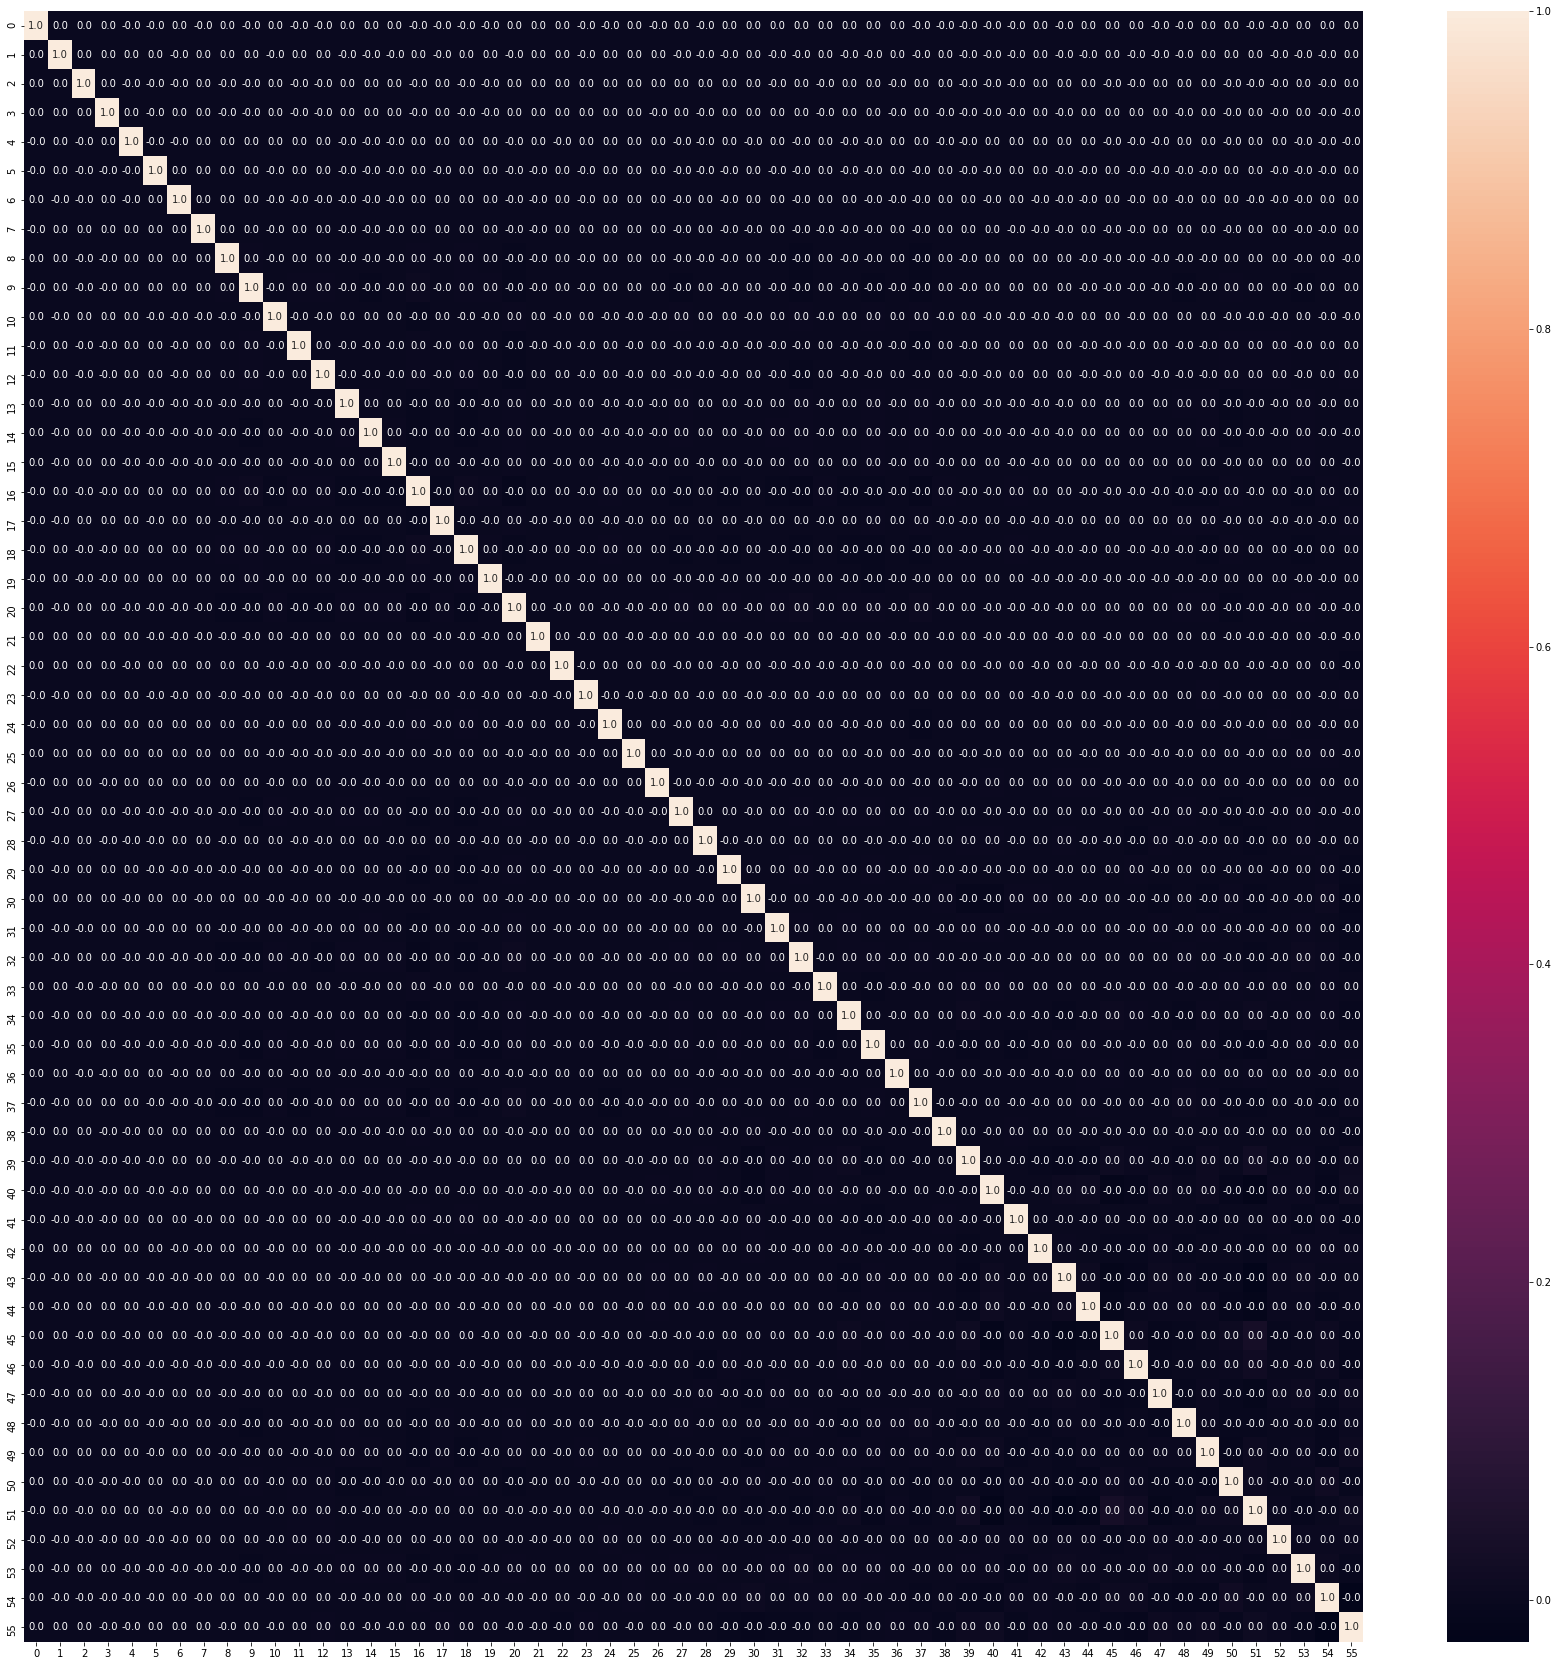

In [566]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize= (30,30))
sns.heatmap(corrmat, annot = True,fmt='.1f')

### Apply PCA transformation on the test dataset

In [567]:
## perform the PCA transformation on the test dataset
telecom_test_pca = pca_final.transform(X_test)

In [568]:
## display the shape
telecom_test_pca.shape

(8982, 56)

In [569]:
## concatenate the X_test PCA components with the y_test
df_telecom_test_pca = pd.concat([pd.DataFrame(telecom_test_pca,columns = cols),y_test], axis = 1)

In [570]:
## display the head of the df
df_telecom_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,Churn
0,2.247286,2.916786,-0.037716,-0.620028,1.774021,-0.790997,1.139932,0.203896,0.970478,-0.619679,0.771736,0.388586,-1.187279,-0.129186,0.052436,-0.155530,0.278592,0.931935,-0.330743,-0.000761,0.208526,-0.144602,-0.374652,-1.519118,-1.214414,-0.204238,-0.561275,-1.046727,-0.085384,-0.537765,-0.430804,-0.575993,-0.389076,-0.552997,-0.358886,-0.225176,-0.069519,0.021710,-0.071566,0.165052,-0.020243,0.364052,-0.582429,-0.111369,-0.382771,-0.015569,-0.705025,0.631467,-0.280625,-0.377345,-0.890700,0.300542,0.286654,0.334143,-0.183678,-0.368682,0
1,-2.713780,-1.577774,1.246425,-0.720556,0.022447,1.737817,0.590009,-2.222980,1.471008,-2.002868,0.566514,0.603012,-0.969730,0.634042,-0.996146,0.800632,0.932952,0.361382,0.360673,0.289744,-0.134139,0.113303,-0.020124,0.713764,0.050624,0.055684,0.690436,-0.399553,0.630584,1.299910,-0.292417,-0.484801,0.259775,0.636459,0.165837,-0.103569,-0.525288,-0.293491,-0.040973,0.177412,-0.107771,-0.972030,-0.158918,0.104243,-0.460238,-0.750873,1.064626,-0.184760,0.297846,0.320999,-0.235373,0.101424,-0.080088,0.064629,0.056817,-0.426207,0
2,-4.170705,-0.511369,2.406328,-0.474804,-0.783322,-2.362802,-3.393850,0.263534,0.924719,-0.377749,-0.794927,-1.126279,-1.300233,-0.011775,-0.466952,-0.206039,-0.492597,-0.448563,-0.161935,-0.432670,-0.858310,-0.500136,0.319555,-0.872598,0.462369,0.074576,-0.144808,-0.455504,0.086419,-1.029782,0.207352,0.624064,-0.177324,0.668502,-0.226679,-0.296510,0.152266,0.467439,-0.336326,-0.013945,-0.251553,-0.463213,-0.341618,-0.730451,0.021666,-0.491033,-0.996921,0.008669,-0.478160,0.264315,0.277353,0.137729,0.249228,0.221232,0.134696,0.495896,0
3,-7.620334,2.967847,6.059672,2.783548,0.895616,6.482627,1.782005,-7.787356,2.219978,-3.300553,-0.177019,4.518287,-2.898769,3.498411,-3.538122,3.621988,1.460952,0.636646,0.989049,-1.340575,-0.172139,0.623842,-1.328230,2.005753,2.115095,0.710104,0.439561,-0.944657,0.941660,0.369904,-0.097430,2.525655,-0.317761,1.624637,0.474041,-1.781704,0.561230,1.564175,0.130662,-1.018203,1.520666,-0.417570,0.564874,-1.032744,-2.817929,-3.149054,5.796637,-1.488932,0.657020,0.350195,-1.422697,0.064825,-0.345212,-0.195538,-0.371756,-1.245522,1
4,2.064703,-0.640960,-1.423258,-3.248846,-0.707238,-1.067113,1.136340,0.448083,0.840136,2.658454,-0.646921,1.126729,-1.486295,0.497778,-2.877438,-0.050717,0.341204,-1.808752,1.137788,-1.436518,2.714597,0.006263,-0.098990,0.347054,-1.113530,-0.801160,0.159987,0.369230,0.823103,0.291086,-0.583036,0.986344,1.146562,-0.172415,-0.478930,1.962064,0.746401,0.644141,-0.558203,-0.298721,-0.439967,1.332542,1.519107,-0.343537,0.771005,0.810487,0.377999,0.589299,0.388996,-0.132623,0.137099,-0.081801,-0.369420,-0.679031,0.859024,-0.239759,0


In [571]:
## write the transformed test df to a csv
df_telecom_test_pca.to_csv("telecom_test_PCA.csv", index = False)

## Modeling

#### Create multiple models to predict Telecom Churn

### Please note :  GridSearch run times are provided in each of the models.  These are run times for PCs with 4 core CPUs with 8GB RAM.  XGBoost was run utilizing the GPU on the PC(Nvidia GTX 1650 with 4GB dedicated video memory)

### Define a function to display model evaluation metrics

In [572]:
## this function takes a fitted classifier and displays the model evaluation metrics in a structured way.  
## It also creates a dataframe with the evaluation metrics

def evaluate_model(classifier,model_name):
    ### Prediction
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import classification_report

    y_pred_train = classifier.predict(X_train)

    Train_accuracy = accuracy_score(y_train,y_pred_train, normalize = True)
    print("Train Accuracy: ", Train_accuracy)

    y_pred_test = classifier.predict(X_test)

    # Calculate the accuracy score for test dataset
    test_accuarcy = accuracy_score(y_test,y_pred_test, normalize = True)
    print("Test Accuracy: ",test_accuarcy)
    
    
    # Classification report and Confusion Matrix for train dataset
    print("\n")
    print("Train dataset Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
    print("\n")
    print("Train dataset Classification Report:\n",classification_report(y_train,y_pred_train))

    # Classification report and Confusion Matrix for test dataset
    print("\n")
    print("Test dataset Confusion Matrix:", '\n',confusion_matrix(y_test,y_pred_test))
    print('\n')
    print("Test dataset Classification Report:\n",classification_report(y_test,y_pred_test))

    ### Probability Estimates , ROC Curve, Precision and Recall Curve on Train dataset

    from sklearn.metrics import precision_recall_curve, auc
    y_train_scores = classifier.predict_proba(X_train)

    precision, recall, thresholds = precision_recall_curve(y_train, y_train_scores[:,1])

    ## Area under Precision Recall Curve
    print("\n")
    print("Train PR-AUC: ",auc(recall, precision))

    # Plot the precision recall curves
    plt.plot(recall, precision, marker='.', label='classifier')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    plt.title("Precision_Recall_Curve")
    # show the plot
    plt.show()

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    roc_auc = roc_auc_score(y_train, y_train_scores[:,1])
    print("Train ROC-AUC: ",roc_auc)

    # plot the roc curve for the model
    classifier_fpr, classifier_tpr, _ = roc_curve(y_train, y_train_scores[:,1])
    plt.plot(classifier_fpr, classifier_tpr, marker='.', label='classifier')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    plt.title("ROC_Curve")
    # show the plot
    plt.show()

    ### Probability Estimates, ROC_Curve, Precision Recall Curve on Test dataset

    from sklearn.metrics import precision_recall_curve, auc
    y_test_scores = classifier.predict_proba(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_scores[:,1])

    ## Area under Precision Recall Curve
    print("Test PR-AUC: ",auc(recall, precision))

    # Plot the precision recall curves
    plt.plot(recall, precision, marker='.', label='classifier')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    plt.title("Precision_Recall_Curve-Test data")
    # show the plot
    plt.show()

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    roc_auc = roc_auc_score(y_test, y_test_scores[:,1])
    print("Test ROC-AUC: ",roc_auc)

    # plot the roc curve for the model
    classifier_fpr, classifier_tpr, _ = roc_curve(y_test, y_test_scores[:,1])
    plt.plot(classifier_fpr, classifier_tpr, marker='.', label='classifier')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    plt.title("ROC_Curve-Test data")
    # show the plot
    plt.show()
    
    train_accuracy = accuracy_score(y_train,y_pred_train)
    train_Precision = precision_score(y_train,y_pred_train)
    train_Recall = recall_score(y_train,y_pred_train)
    y_train_scores = classifier.predict_proba(X_train)
    precision, recall, thresholds = precision_recall_curve(y_train, y_train_scores[:,1])
    train_PR_AUC = auc(recall, precision)
    train_roc_auc = roc_auc_score(y_train, y_train_scores[:,1])

    test_accuracy = accuracy_score(y_test,y_pred_test)
    test_Precision = precision_score(y_test,y_pred_test)
    test_Recall = recall_score(y_test,y_pred_test)
    y_test_scores = classifier.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_scores[:,1])
    test_PR_AUC = auc(recall, precision)
    test_roc_auc = roc_auc_score(y_test, y_test_scores[:,1])


    col_names=['Model name','train_accuracy','train_Precision','train_Recall','train_PR_AUC','train_roc_auc','test_accuracy','test_Precision','test_Recall','test_PR_AUC','test_roc_auc']
    cols =[model_name,train_accuracy,train_Precision,train_Recall,train_PR_AUC,train_roc_auc,test_accuracy,test_Precision,test_Recall,test_PR_AUC,test_roc_auc]
    metrics_df = pd.DataFrame([cols],columns=col_names)
    print(metrics_df)
    return metrics_df

## LogisticRegression with PCA

In [573]:
## import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [574]:
## read the train and test datasets
telecom_train =  pd.read_csv('telecom_train_PCA.csv')
telecom_test =  pd.read_csv('telecom_test_PCA.csv')

X_train = telecom_train.drop(columns='Churn')
y_train = telecom_train['Churn']

X_test = telecom_test.drop(columns='Churn')
y_test = telecom_test['Churn']

#### Model without Hyperparameter tuning

In [575]:
## create a model object with random parameters
model = LogisticRegression(random_state=42, C=1)

In [576]:
## fit the model
model.fit(X_train, y_train)

LogisticRegression(C=1, random_state=42)

Train Accuracy:  0.8773178425790567
Test Accuracy:  0.9042529503451348


Train dataset Confusion Matrix:
 [[17923  1332]
 [ 1857  4882]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     19255
           1       0.79      0.72      0.75      6739

    accuracy                           0.88     25994
   macro avg       0.85      0.83      0.84     25994
weighted avg       0.87      0.88      0.88     25994



Test dataset Confusion Matrix: 
 [[7642  611]
 [ 249  480]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8253
           1       0.44      0.66      0.53       729

    accuracy                           0.90      8982
   macro avg       0.70      0.79      0.74      8982
weighted avg       0.93      0.90      0.91      8982



Train PR-AUC:  0.7939134860530248


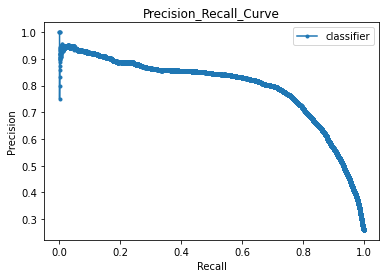

Train ROC-AUC:  0.9144364173259218


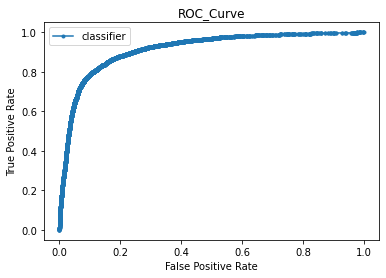

Test PR-AUC:  0.4975944072368283


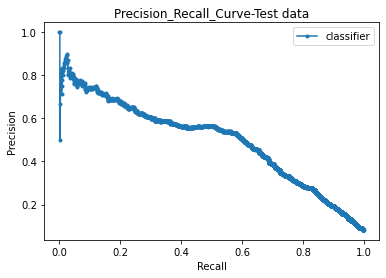

Test ROC-AUC:  0.8863388746528885


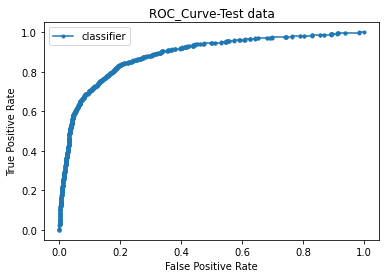

                       Model name  train_accuracy  train_Precision  \
0  Logistic Regression Base Model        0.877318         0.785645   

   train_Recall  train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  \
0       0.72444      0.793913       0.914436       0.904253        0.439963   

   test_Recall  test_PR_AUC  test_roc_auc  
0     0.658436     0.497594      0.886339  


In [577]:
##  check the classifier evaluation metrics
lr_base_metrics_df = evaluate_model(model,'Logistic Regression Base Model')

In [578]:
## predict the train and test probabilities using the model
y_train_pred_1 = model.predict_proba(X_train)
y_test_pred_1 = model.predict_proba(X_test)

In [579]:
## determine the accuracy, precsion and recall for different cut-off points
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report


cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
recall=[]
preci=[]
accu=[]
for cut_off in np.arange(0.1,1,0.1):
    y_train_pred_2 = pd.Series(y_train_pred_1[:,1]).apply(lambda x : 1 if x > cut_off else 0)
    cf = confusion_matrix(y_train,y_train_pred_2)
    acc = accuracy_score(y_train,y_train_pred_2)
    pre = precision_score(y_train,y_train_pred_2)
    rec = recall_score(y_train,y_train_pred_2)
    
    accu.append(acc)
    preci.append(pre)
    recall.append(rec)
    
    cutoff_df.loc[cut_off] = [cut_off, acc, pre, rec]

In [580]:
## display the cutoff dataframe
cutoff_df

,prob,accuracy,precision,recall
0.1,0.1,0.719474,0.479096,0.940347
0.2,0.2,0.810841,0.589949,0.886630
0.3,0.3,0.853389,0.677240,0.830093
0.4,0.4,0.871163,0.739474,0.776673
0.5,0.5,0.877318,0.785645,0.724440
0.6,0.6,0.869778,0.820405,0.637187
0.7,0.7,0.845310,0.846861,0.492358
0.8,0.8,0.805032,0.865966,0.293367
0.9,0.9,0.773063,0.910959,0.138151


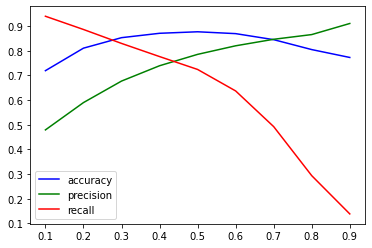

In [581]:
## plot the accuracy, precision and recall for the different cut-offs
plt.plot(np.arange(0.1,1,0.1),accu,color='b',label='accuracy')
plt.plot(np.arange(0.1,1,0.1),preci,color='g',label='precision')
plt.plot(np.arange(0.1,1,0.1),recall,color='r',label='recall')
plt.legend()

From the above 0.4 cutoff seems to be tradeoff between precision and recall

In [582]:
## use the determined cut-off to predict the Churn in train and test
y_train_pred = pd.Series(y_train_pred_1[:,1]).apply(lambda x : 1 if x > 0.4 else 0)
y_test_pred  = pd.Series(y_test_pred_1[:,1]).apply(lambda x : 1 if x > 0.4 else 0)

In [583]:
## display the model evaluation metrics
print("Train recall :", recall_score(y_train,y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print(classification_report(y_train, y_train_pred))
print("-"*50)
print("-"*50)
print("Test recall :", recall_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train recall : 0.7766730968986496
Train Confusion Matrix:
[[17411  1844]
 [ 1505  5234]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     19255
           1       0.74      0.78      0.76      6739

    accuracy                           0.87     25994
   macro avg       0.83      0.84      0.83     25994
weighted avg       0.87      0.87      0.87     25994

--------------------------------------------------
--------------------------------------------------
Test recall : 0.7064471879286695
Test Confusion Matrix:
[[7407  846]
 [ 214  515]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8253
           1       0.38      0.71      0.49       729

    accuracy                           0.88      8982
   macro avg       0.68      0.80      0.71      8982
weighted avg       0.92  

The precision is low at 0.38 with 0.4 cut-off point for the test dataset.  So the default model created with 0.5 cutoff points seems the best

### Grid search for hyper-parameter tuning - Takes less than 1 min

In [584]:
## crete a default model object
model = LogisticRegression(random_state=42, n_jobs=-1)

In [585]:
# creating a KFold object with 4 splits 
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 101)

# Create the parameter grid based on the results of random search 
params = {
    'C': [1, 10, 100, 1000]
}

In [586]:
# Instantiate the grid search model
model_cv = GridSearchCV(estimator=model, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = "recall")

In [587]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:24:02 2020


In [588]:
## fit the model_cv
model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    4.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=101, shuffle=True),
             estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]}, scoring='recall',
             verbose=1)

In [589]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:24:09 2020


In [590]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.775675,0.113664,0.011723,0.000831,1,{'C': 1},0.71632,0.729970,0.729216,0.724629,0.725034,0.005430,4
1,0.829780,0.054270,0.011969,0.001866,10,{'C': 10},0.71632,0.730564,0.729216,0.724629,0.725182,0.005569,1
2,0.912308,0.078127,0.011220,0.000828,100,{'C': 100},0.71632,0.730564,0.729216,0.724629,0.725182,0.005569,1
3,0.831278,0.049187,0.010720,0.003621,1000,{'C': 1000},0.71632,0.730564,0.729216,0.724629,0.725182,0.005569,1


Let's now choose the best hyperparameters. 

In [591]:
# printing the best score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7251823762836824 corresponding to hyperparameters {'C': 10}


In [592]:
## get the best estimator from gridsearch
model_best = model_cv.best_estimator_

In [593]:
## display the best model
model_best

LogisticRegression(C=10, n_jobs=-1, random_state=42)

In [594]:
## fit the best model
model_best.fit(X_train,y_train)

LogisticRegression(C=10, n_jobs=-1, random_state=42)

Train Accuracy:  0.8773947834115565
Test Accuracy:  0.9042529503451348


Train dataset Confusion Matrix:
 [[17926  1329]
 [ 1858  4881]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     19255
           1       0.79      0.72      0.75      6739

    accuracy                           0.88     25994
   macro avg       0.85      0.83      0.84     25994
weighted avg       0.87      0.88      0.88     25994



Test dataset Confusion Matrix: 
 [[7642  611]
 [ 249  480]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8253
           1       0.44      0.66      0.53       729

    accuracy                           0.90      8982
   macro avg       0.70      0.79      0.74      8982
weighted avg       0.93      0.90      0.91      8982



Train PR-AUC:  0.7939270011687242


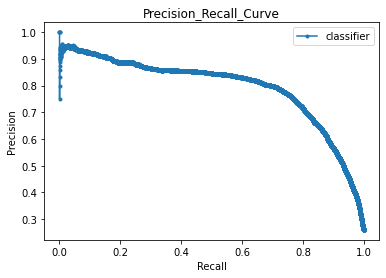

Train ROC-AUC:  0.9144523082693519


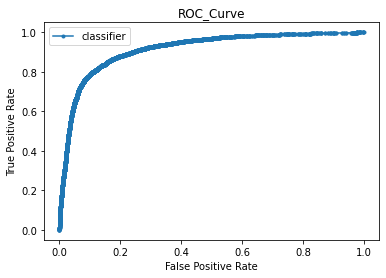

Test PR-AUC:  0.49776922278957797


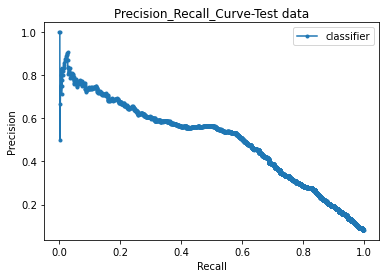

Test ROC-AUC:  0.8863362152715967


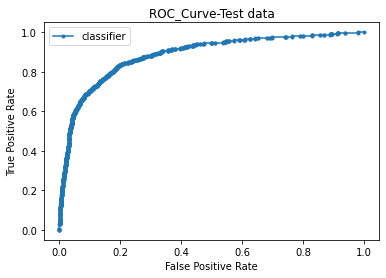

                           Model name  train_accuracy  train_Precision  \
0  Logistic Regression HypTuned Model        0.877395          0.78599   

   train_Recall  train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  \
0      0.724291      0.793927       0.914452       0.904253        0.439963   

   test_Recall  test_PR_AUC  test_roc_auc  
0     0.658436     0.497769      0.886336  


In [595]:
##  check the classifier evaluation metrics
lr_hyp_metrics_df = evaluate_model(model_best,'Logistic Regression HypTuned Model')

## XGBoosting Classifer with PCA

In [596]:
## import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [597]:
## read the train and test datasets
telecom_train =  pd.read_csv('telecom_train_PCA.csv')
telecom_test =  pd.read_csv('telecom_test_PCA.csv')

X_train = telecom_train.drop(columns='Churn')
y_train = telecom_train['Churn']

X_test = telecom_test.drop(columns='Churn')
y_test = telecom_test['Churn']

#### Model without Hyperparameter tuning

In [598]:
## create a model object with random parameters
model = XGBClassifier(max_depth=2,tree_method='gpu_hist')

In [599]:
## fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

Train Accuracy:  0.8925136569977687
Test Accuracy:  0.9085949677132041


Train dataset Confusion Matrix:
 [[18169  1086]
 [ 1708  5031]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93     19255
           1       0.82      0.75      0.78      6739

    accuracy                           0.89     25994
   macro avg       0.87      0.85      0.86     25994
weighted avg       0.89      0.89      0.89     25994



Test dataset Confusion Matrix: 
 [[7703  550]
 [ 271  458]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8253
           1       0.45      0.63      0.53       729

    accuracy                           0.91      8982
   macro avg       0.71      0.78      0.74      8982
weighted avg       0.92      0.91      0.92      8982



Train PR-AUC:  0.8531058915919807


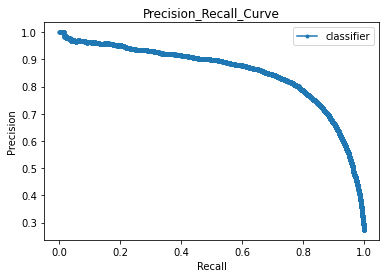

Train ROC-AUC:  0.940764443004515


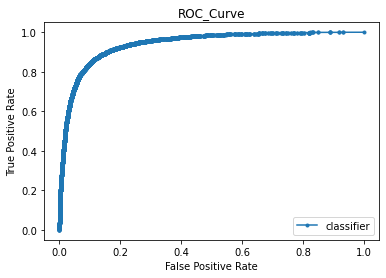

Test PR-AUC:  0.4996846556464223


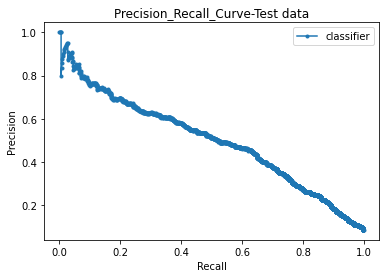

Test ROC-AUC:  0.8842245003147211


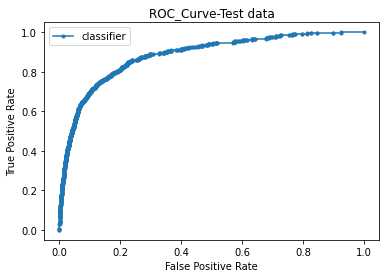

           Model name  train_accuracy  train_Precision  train_Recall  \
0  XGBoost Base Model        0.892514         0.822462       0.74655   

   train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  test_Recall  \
0      0.853106       0.940764       0.908595        0.454365     0.628258   

   test_PR_AUC  test_roc_auc  
0     0.499685      0.884225  


In [600]:
##  check the classifier evaluation metrics
xg_base_metrics_df = evaluate_model(model,'XGBoost Base Model')

### Grid search for hyper-parameter tuning - Takes upto 1 min if run on machine with GPU. Else could take 10 mins

In [601]:
from collections import Counter 
counter = Counter(y_train)
scale_pos_wt = counter[0]/counter[1]
scale_pos_wt

2.8572488499777413

In [602]:
## crete a default model object
model = XGBClassifier(tree_method='gpu_hist')

In [603]:
# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 101)

# Create the parameter grid based on the results of random search 
params = {
    "max_depth" : [2,3],
    "learning_rate": [0.1],
    "n_estimators":[100,200],
    "min_child_weight":[1,10,100],
    "gamma":[0,1,30]
}

In [604]:
# Instantiate the grid search model
model_cv = GridSearchCV(estimator=model, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = "recall")

In [605]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:24:14 2020


In [606]:
## fit the model_cv
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   38.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missi...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                           

In [607]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:24:54 2020


In [608]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.224245,0.285820,0.126994,0.034743,0,0.1,2,1,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.642476,0.649755,0.650490,0.647574,0.003617,25
1,4.257149,0.400064,0.100730,0.008618,0,0.1,2,1,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.694568,0.708055,0.707925,0.703516,0.006327,12
2,2.635862,0.874214,0.080119,0.007566,0,0.1,2,10,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.643811,0.645750,0.654052,0.647871,0.004442,23
3,2.828767,0.071262,0.119349,0.015713,0,0.1,2,10,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.697685,0.709390,0.711487,0.706187,0.006073,9
4,1.686157,0.139950,0.078124,0.013683,0,0.1,2,100,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.631790,0.640854,0.642030,0.638225,0.004575,35
5,3.054164,0.039090,0.098071,0.007910,0,0.1,2,100,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.680321,0.704940,0.698575,0.694612,0.010434,15
6,2.199783,0.086303,0.099402,0.004099,0,0.1,3,1,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.696349,0.712061,0.712378,0.706929,0.007482,7
7,4.086070,0.188189,0.134640,0.021591,0,0.1,3,1,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.728406,0.743213,0.746661,0.739427,0.007919,1
8,2.274250,0.070791,0.097407,0.010753,0,0.1,3,10,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.693678,0.705385,0.710597,0.703220,0.007075,14
9,4.357346,0.192158,0.157579,0.019996,0,0.1,3,10,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.728406,0.745438,0.741763,0.738536,0.007318,2


Let's now choose the best hyperparameters. 

In [609]:
# printing the best score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7394266528386585 corresponding to hyperparameters {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}


In [610]:
## get the best estimator from grid search
model_best = model_cv.best_estimator_

In [611]:
## display the best model
model_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [612]:
## fit the best model
model_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

Train Accuracy:  0.9043625452027391
Test Accuracy:  0.9103763081718994


Train dataset Confusion Matrix:
 [[18260   995]
 [ 1491  5248]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     19255
           1       0.84      0.78      0.81      6739

    accuracy                           0.90     25994
   macro avg       0.88      0.86      0.87     25994
weighted avg       0.90      0.90      0.90     25994



Test dataset Confusion Matrix: 
 [[7733  520]
 [ 285  444]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      8253
           1       0.46      0.61      0.52       729

    accuracy                           0.91      8982
   macro avg       0.71      0.77      0.74      8982
weighted avg       0.92      0.91      0.92      8982



Train PR-AUC:  0.8862518948022626


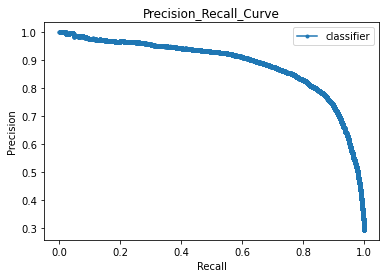

Train ROC-AUC:  0.9552571298374465


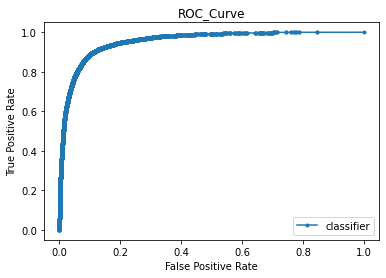

Test PR-AUC:  0.49672330551414123


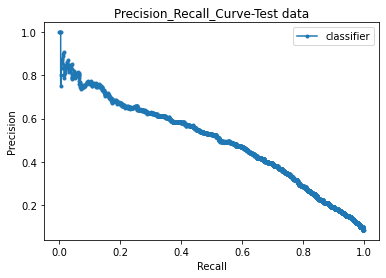

Test ROC-AUC:  0.8885571310727595


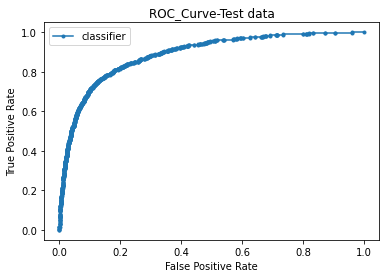

               Model name  train_accuracy  train_Precision  train_Recall  \
0  XGBoost HypTuned Model        0.904363         0.840621      0.778751   

   train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  test_Recall  \
0      0.886252       0.955257       0.910376        0.460581     0.609053   

   test_PR_AUC  test_roc_auc  
0     0.496723      0.888557  


In [613]:
##  check the classifier evaluation metrics
xg_hyp_metrics_df = evaluate_model(model_best,'XGBoost HypTuned Model')

## GradientBoosting Classifer with PCA

In [614]:
## import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [615]:
## read the train and test datasets
telecom_train =  pd.read_csv('telecom_train_PCA.csv')
telecom_test =  pd.read_csv('telecom_test_PCA.csv')

X_train = telecom_train.drop(columns='Churn')
y_train = telecom_train['Churn']

X_test = telecom_test.drop(columns='Churn')
y_test = telecom_test['Churn']

#### Model without Hyperparameter tuning

In [616]:
## create a model object with random parameters
model = GradientBoostingClassifier(max_depth=4, max_features='auto', min_samples_leaf=10)

In [617]:
## fit the model
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features='auto',
                           min_samples_leaf=10)

Train Accuracy:  0.9095560513964761
Test Accuracy:  0.910042306835894


Train dataset Confusion Matrix:
 [[18350   905]
 [ 1446  5293]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     19255
           1       0.85      0.79      0.82      6739

    accuracy                           0.91     25994
   macro avg       0.89      0.87      0.88     25994
weighted avg       0.91      0.91      0.91     25994



Test dataset Confusion Matrix: 
 [[7730  523]
 [ 285  444]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      8253
           1       0.46      0.61      0.52       729

    accuracy                           0.91      8982
   macro avg       0.71      0.77      0.74      8982
weighted avg       0.92      0.91      0.92      8982



Train PR-AUC:  0.8980924778052919


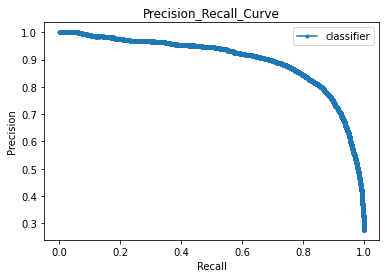

Train ROC-AUC:  0.9586710239088956


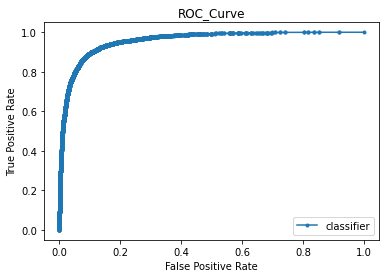

Test PR-AUC:  0.5042492820547597


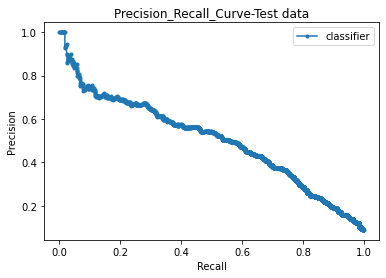

Test ROC-AUC:  0.890415207538947


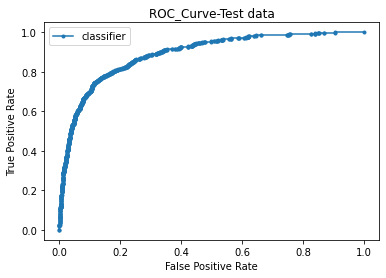

                  Model name  train_accuracy  train_Precision  train_Recall  \
0  Gradient Boost Base Model        0.909556         0.853985      0.785428   

   train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  test_Recall  \
0      0.898092       0.958671       0.910042        0.459152     0.609053   

   test_PR_AUC  test_roc_auc  
0     0.504249      0.890415  


In [618]:
##  check the classifier evaluation metrics
gb_base_metrics_df = evaluate_model(model,'Gradient Boost Base Model')

### Grid search for hyper-parameter tuning - Takes between 6 to 8 mins

In [619]:
## crete a default model object
model = GradientBoostingClassifier()

In [620]:
# creating a KFold object with 3 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 101)

# Create the parameter grid based on the results of random search 
params = {
    "max_depth" : [2,3],
    "n_estimators":[100,200],
    "max_features":['auto','None'],
    "min_samples_leaf":[5,10,25]
}

In [621]:
# Instantiate the grid search model
model_cv = GridSearchCV(estimator=model, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = "recall")

In [622]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:25:55 2020


In [623]:
## fit the model_cv
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  4.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3], 'max_features': ['auto', 'None'],
                         'min_samples_leaf': [5, 10, 25],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [624]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:31:46 2020


In [625]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,29.094519,0.155409,0.026928,2.154609e-03,2,auto,5,100,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.642030,0.644415,0.651380,0.645942,0.003967,12
1,59.112125,0.314488,0.036901,8.138094e-04,2,auto,5,200,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.691897,0.708945,0.703918,0.701587,0.007153,9
2,29.544055,0.350303,0.025930,1.410234e-03,2,auto,10,100,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.646483,0.645305,0.647373,0.646387,0.000847,11
3,59.890659,0.045286,0.036479,4.213407e-04,2,auto,10,200,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.697240,0.704050,0.710151,0.703814,0.005274,8
4,29.766097,0.364163,0.024934,2.247832e-07,2,auto,25,100,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.645147,0.645305,0.653161,0.647871,0.003741,10
5,59.269889,0.203271,0.036901,2.973602e-07,2,auto,25,200,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.691006,0.709835,0.711487,0.704110,0.009290,7
6,0.027592,0.001695,0.000000,0.000000e+00,2,None,5,100,"{'max_depth': 2, 'max_features': 'None', 'min_...",NaN,NaN,NaN,NaN,NaN,22
7,0.036236,0.003672,0.000000,0.000000e+00,2,None,5,200,"{'max_depth': 2, 'max_features': 'None', 'min_...",NaN,NaN,NaN,NaN,NaN,21
8,0.030252,0.002049,0.000000,0.000000e+00,2,None,10,100,"{'max_depth': 2, 'max_features': 'None', 'min_...",NaN,NaN,NaN,NaN,NaN,20
9,0.033908,0.008463,0.000000,0.000000e+00,2,None,10,200,"{'max_depth': 2, 'max_features': 'None', 'min_...",NaN,NaN,NaN,NaN,NaN,19


Let's now choose the best hyperparameters. 

In [626]:
# printing the best score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7416527006160915 corresponding to hyperparameters {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 200}


In [627]:
## get the best estimator from grid search
model_best = model_cv.best_estimator_

In [628]:
## display the best model
model_best

GradientBoostingClassifier(max_features='auto', min_samples_leaf=10,
                           n_estimators=200)

In [629]:
## fit the best model
model_best.fit(X_train,y_train)

GradientBoostingClassifier(max_features='auto', min_samples_leaf=10,
                           n_estimators=200)

Train Accuracy:  0.906824651842733
Test Accuracy:  0.9104876419505677


Train dataset Confusion Matrix:
 [[18322   933]
 [ 1489  5250]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     19255
           1       0.85      0.78      0.81      6739

    accuracy                           0.91     25994
   macro avg       0.89      0.87      0.88     25994
weighted avg       0.91      0.91      0.91     25994



Test dataset Confusion Matrix: 
 [[7737  516]
 [ 288  441]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      8253
           1       0.46      0.60      0.52       729

    accuracy                           0.91      8982
   macro avg       0.71      0.77      0.74      8982
weighted avg       0.92      0.91      0.92      8982



Train PR-AUC:  0.8919191707399542


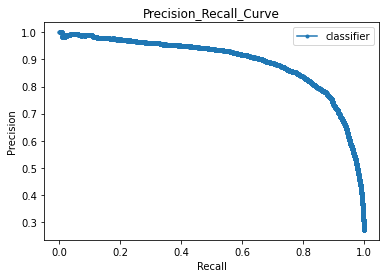

Train ROC-AUC:  0.9564384465423692


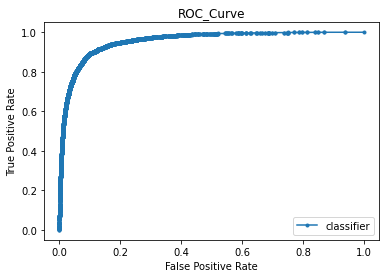

Test PR-AUC:  0.5044715205956256


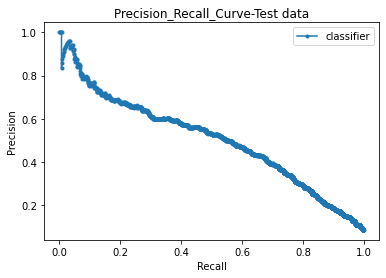

Test ROC-AUC:  0.8878366049540617


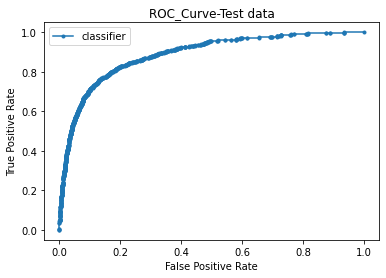

                      Model name  train_accuracy  train_Precision  \
0  Gradient Boost HypTuned Model        0.906825         0.849102   

   train_Recall  train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  \
0      0.779047      0.891919       0.956438       0.910488        0.460815   

   test_Recall  test_PR_AUC  test_roc_auc  
0     0.604938     0.504472      0.887837  


In [630]:
##  check the classifier evaluation metrics
gb_hyp_metrics_df = evaluate_model(model_best,'Gradient Boost HypTuned Model')

## RandomForest Classifer with PCA

In [631]:
## import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [632]:
## read the train and test datasets
telecom_train =  pd.read_csv('telecom_train_PCA.csv')
telecom_test =  pd.read_csv('telecom_test_PCA.csv')

X_train = telecom_train.drop(columns='Churn')
y_train = telecom_train['Churn']

X_test = telecom_test.drop(columns='Churn')
y_test = telecom_test['Churn']

#### Model without Hyperparameter tuning

In [633]:
## create a model object with random parameters
model = RandomForestClassifier(random_state=42, max_depth=10)

In [634]:
## fit the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Train Accuracy:  0.9348695852889128
Test Accuracy:  0.9210643509240704


Train dataset Confusion Matrix:
 [[18815   440]
 [ 1253  5486]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     19255
           1       0.93      0.81      0.87      6739

    accuracy                           0.93     25994
   macro avg       0.93      0.90      0.91     25994
weighted avg       0.93      0.93      0.93     25994



Test dataset Confusion Matrix: 
 [[7936  317]
 [ 392  337]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      8253
           1       0.52      0.46      0.49       729

    accuracy                           0.92      8982
   macro avg       0.73      0.71      0.72      8982
weighted avg       0.92      0.92      0.92      8982



Train PR-AUC:  0.9524425087714896


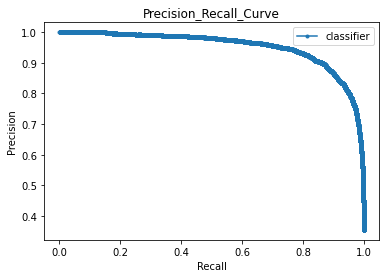

Train ROC-AUC:  0.9826063066160619


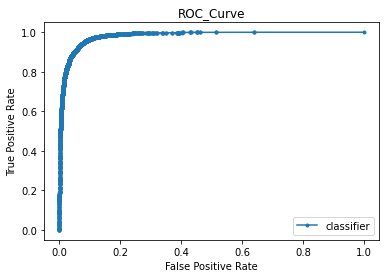

Test PR-AUC:  0.4768162949497418


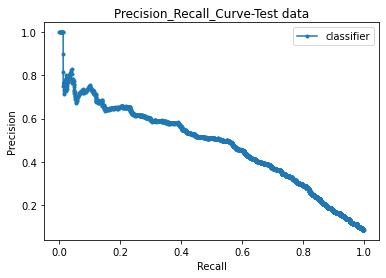

Test ROC-AUC:  0.8797123613194986


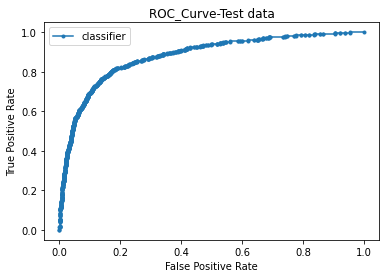

                 Model name  train_accuracy  train_Precision  train_Recall  \
0  Random Forest Base Model         0.93487         0.925751      0.814067   

   train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  test_Recall  \
0      0.952443       0.982606       0.921064        0.515291     0.462277   

   test_PR_AUC  test_roc_auc  
0     0.476816      0.879712  


In [635]:
##  check the classifier evaluation metrics
rf_base_metrics_df = evaluate_model(model,'Random Forest Base Model')

### Grid search for hyper-parameter tuning - Takes about 2 to 3 mins

In [636]:
## crete a default model object
model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [637]:
# creating a KFold object with 4 splits 
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 101)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5,10],
    'min_samples_leaf': [5,10,20],
    'max_features': ['auto','None'],
    'n_estimators': [100,200]
}

In [638]:
# Instantiate the grid search model
model_cv = GridSearchCV(estimator=model, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = "recall")

In [639]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:33:21 2020


In [640]:
## fit the model_cv
model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'None'],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [641]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:34:55 2020


In [642]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,3.941955,0.127617,3.115169,0.017050,5,auto,5,100,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.426706,0.397626,0.415083,0.433234,0.418162,0.013522,8
1,11.040221,0.177460,3.205373,0.051800,5,auto,5,200,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.421365,0.393472,0.408551,0.426113,0.412375,0.012664,10
2,7.284712,0.130228,0.114195,0.036756,5,auto,10,100,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.426113,0.388131,0.423990,0.437389,0.418906,0.018483,7
3,10.871524,0.280748,1.124392,0.828758,5,auto,10,200,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.416024,0.394659,0.407957,0.422552,0.410298,0.010404,11
4,7.451818,0.182729,3.039572,0.106613,5,auto,20,100,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.423145,0.389318,0.423990,0.430267,0.416680,0.016036,9
5,7.707898,0.232756,0.336503,0.116196,5,auto,20,200,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.418398,0.391691,0.409145,0.420772,0.410001,0.011429,12
6,3.047213,0.218618,0.000000,0.000000,5,None,5,100,"{'max_depth': 5, 'max_features': 'None', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,22
7,2.883599,1.163062,0.000000,0.000000,5,None,5,200,"{'max_depth': 5, 'max_features': 'None', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,21
8,0.546522,0.100014,0.000000,0.000000,5,None,10,100,"{'max_depth': 5, 'max_features': 'None', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,20
9,0.427521,0.021256,0.000000,0.000000,5,None,10,200,"{'max_depth': 5, 'max_features': 'None', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,19


Let's now choose the best hyperparameters. 

In [643]:
# printing the best score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.6874928635367255 corresponding to hyperparameters {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 100}


In [644]:
## get the best estimator from grid search
model_best = model_cv.best_estimator_

In [645]:
## display the best model
model_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [646]:
## fit the best model
model_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

Train Accuracy:  0.9278294991151804
Test Accuracy:  0.9221776887107549


Train dataset Confusion Matrix:
 [[18777   478]
 [ 1398  5341]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     19255
           1       0.92      0.79      0.85      6739

    accuracy                           0.93     25994
   macro avg       0.92      0.88      0.90     25994
weighted avg       0.93      0.93      0.93     25994



Test dataset Confusion Matrix: 
 [[7938  315]
 [ 384  345]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      8253
           1       0.52      0.47      0.50       729

    accuracy                           0.92      8982
   macro avg       0.74      0.72      0.73      8982
weighted avg       0.92      0.92      0.92      8982



Train PR-AUC:  0.94264588055833


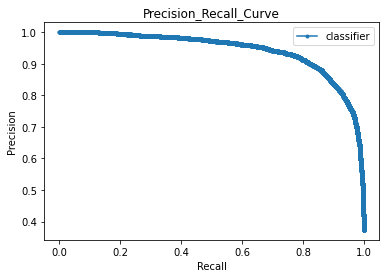

Train ROC-AUC:  0.978709395682141


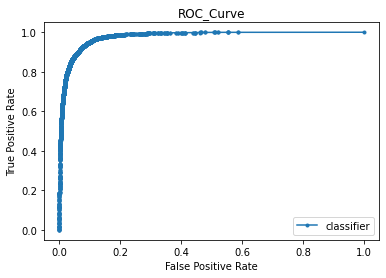

Test PR-AUC:  0.4853417866476334


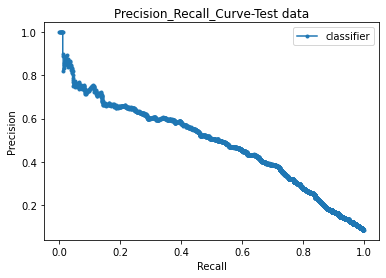

Test ROC-AUC:  0.8781792280048807


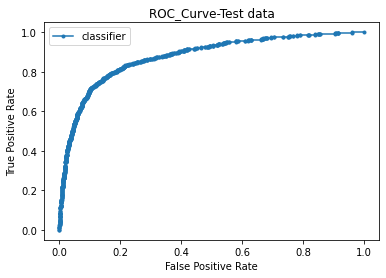

                     Model name  train_accuracy  train_Precision  \
0  Random Forest HypTuned Model        0.927829         0.917855   

   train_Recall  train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  \
0      0.792551      0.942646       0.978709       0.922178        0.522727   

   test_Recall  test_PR_AUC  test_roc_auc  
0     0.473251     0.485342      0.878179  


In [647]:
##  check the classifier evaluation metrics
rf_hyp_metrics_df = evaluate_model(model_best,'Random Forest HypTuned Model')

## SVM with PCA

In [648]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [649]:
# Import the train dataset
telecom_train_pca = pd.read_csv("telecom_train_PCA.csv")

In [650]:
## display the shape
telecom_train_pca.shape

(25994, 57)

In [651]:
# Import the test dataset
telecom_test_pca = pd.read_csv("telecom_test_PCA.csv")

In [652]:
## display the shape
telecom_test_pca.shape

(8982, 57)

In [653]:
## create X_test and y_test
y_test = telecom_test_pca.pop('Churn')
X_test = telecom_test_pca

### SVM Algorithm

In [654]:
# Separate the train dataset into X and Y
y_train = telecom_train_pca.pop('Churn')
X_train = telecom_train_pca

In [655]:
## display the y_train head
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [656]:
##display the X_train head
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56
0,0.963128,-3.126614,0.533003,4.418050,-0.049804,1.891909,-2.711178,-1.282563,0.902935,-0.517044,-0.347122,-0.868482,1.200590,-0.673377,-0.412036,0.136609,-0.264146,0.533837,-0.255125,0.223425,-0.545653,0.194043,-0.678401,-0.417886,-2.036406,0.449158,2.300808,-0.098274,1.198544,0.608713,0.226914,1.668058,-0.603477,0.140329,-0.272589,0.029760,-0.209414,0.409364,-0.122754,0.322985,-0.387862,0.874380,-0.301052,-1.105838,-0.014097,0.260341,-0.584917,0.273240,0.682276,-0.229704,0.778518,-1.019523,-0.041609,0.306749,0.267306,0.234332
1,-2.851665,-1.255744,0.003627,-1.905944,-0.736228,-0.248357,2.344332,-0.532045,-0.068287,-0.116541,0.553592,-0.742094,-0.283669,-0.779647,0.430524,-0.500036,0.074601,0.749362,-0.907420,-0.032537,-0.567424,0.026477,0.067218,0.483636,0.992899,0.298829,0.782277,-0.225126,0.286711,0.517857,0.121585,-0.097604,0.041891,0.734049,-0.055674,-0.604828,-0.642397,0.178477,0.466768,0.237459,0.294694,0.147829,-0.111786,-0.158163,0.092287,0.468402,-0.847132,0.796040,-0.125783,0.531641,0.057185,0.021569,-0.006609,0.053293,-0.643971,0.098239
2,-2.956523,4.008696,-1.271745,0.778335,7.653701,0.367130,-1.368928,-0.030679,0.944675,-1.977910,3.670744,2.846020,-1.491191,3.178965,-2.769529,0.011650,1.923208,1.108410,1.155269,-2.096936,-0.179893,-1.593953,2.135635,-5.044507,0.100272,0.017227,-1.455702,1.037130,-0.640014,-0.027817,-0.576721,-0.035035,0.780200,-0.367952,-0.635055,1.648696,-0.380565,-0.448041,3.061876,0.568690,-0.722234,0.702897,-0.440375,0.060325,1.440436,0.089790,1.152534,1.485327,-0.339674,-0.022982,0.655784,-0.299227,0.106774,0.249778,1.790166,-0.169124
3,0.820277,-3.120560,-0.478094,-0.878022,-0.164362,-0.617459,0.486017,-0.647860,-0.789375,-0.060455,0.255413,0.177660,-0.149178,-0.469677,0.446486,-0.210552,0.706343,0.466966,-0.165065,1.620201,0.252336,-0.043896,0.036342,0.012504,0.339130,-0.678995,-0.143567,-0.056047,-0.163766,-0.698674,-0.027701,0.278553,-0.249093,-0.805799,-0.189018,0.477662,0.148082,0.218246,-0.367724,0.012894,0.067205,0.413668,-0.351418,-0.822445,0.906167,-0.336803,-0.185875,-0.272413,-0.566370,-0.233042,0.223400,0.047094,-0.991086,1.139022,-0.242458,0.053347
4,-4.376142,-0.387648,1.565615,-0.348814,-1.879902,-2.932830,-0.678124,1.130272,-0.448124,0.783646,-0.640783,-0.943394,1.048129,-1.494625,0.889468,-0.669933,-0.338011,0.500466,-1.000953,0.651806,-0.180712,-0.339139,-0.021481,-0.529253,-0.326524,-0.391077,0.500634,-0.414391,0.685387,0.249770,-0.143505,-1.115495,0.820318,-0.081056,-0.796089,0.185283,-0.177127,-0.345769,-0.184769,0.522497,0.045362,-0.271293,-0.260467,-0.118995,-0.196575,-0.735012,1.124949,0.447468,0.410131,0.402813,-0.305066,-0.315893,0.113946,0.105959,0.198557,0.014452


In [657]:
## display the X_train shape
X_train.shape

(25994, 56)

In [658]:
## Start time
print("SVM Start Time :",ctime())

SVM Start Time : Mon Dec 28 20:34:59 2020


In [659]:
# Fit the SVM base model
from sklearn.svm import SVC
svclassifier= SVC(kernel = 'rbf',probability = True)
svclassifier.fit(X_train,y_train)

SVC(probability=True)

In [660]:
## End time
print("SVM End Time :",ctime())

SVM End Time : Mon Dec 28 20:37:21 2020


### Predictions and Evaluate SVM Model

Train Accuracy:  0.9116334538739709
Test Accuracy:  0.9142729904252951


Train dataset Confusion Matrix:
 [[18215  1040]
 [ 1257  5482]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     19255
           1       0.84      0.81      0.83      6739

    accuracy                           0.91     25994
   macro avg       0.89      0.88      0.88     25994
weighted avg       0.91      0.91      0.91     25994



Test dataset Confusion Matrix: 
 [[7743  510]
 [ 260  469]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8253
           1       0.48      0.64      0.55       729

    accuracy                           0.91      8982
   macro avg       0.72      0.79      0.75      8982
weighted avg       0.93      0.91      0.92      8982



Train PR-AUC:  0.8790493626568189


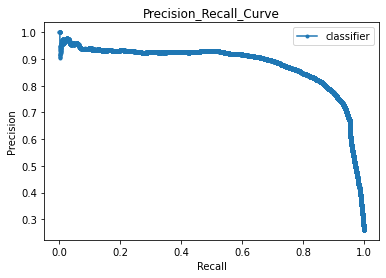

Train ROC-AUC:  0.9556262127970723


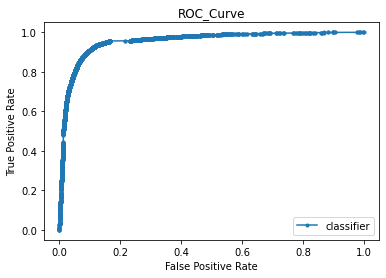

Test PR-AUC:  0.5178649396257236


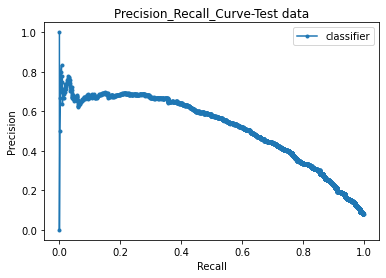

Test ROC-AUC:  0.9039325102215812


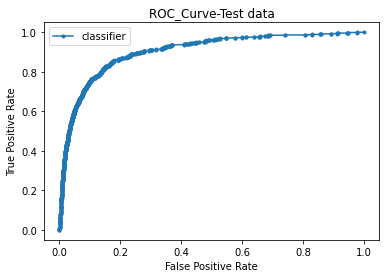

       Model name  train_accuracy  train_Precision  train_Recall  \
0  SVM Base Model        0.911633          0.84054      0.813474   

   train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  test_Recall  \
0      0.879049       0.955626       0.914273         0.47906     0.643347   

   test_PR_AUC  test_roc_auc  
0     0.517865      0.903933  


In [661]:
##  check the classifier evaluation metrics
svm_base_metrics_df = evaluate_model(svclassifier,'SVM Base Model')

### Decision Tree Model with PCA

In [662]:
# Base Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 9)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

### Prediction and evaluate Decision Tree base Model 

Train Accuracy:  0.9103639301377241
Test Accuracy:  0.8758628367846805


Train dataset Confusion Matrix:
 [[18183  1072]
 [ 1258  5481]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     19255
           1       0.84      0.81      0.82      6739

    accuracy                           0.91     25994
   macro avg       0.89      0.88      0.88     25994
weighted avg       0.91      0.91      0.91     25994



Test dataset Confusion Matrix: 
 [[7484  769]
 [ 346  383]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      8253
           1       0.33      0.53      0.41       729

    accuracy                           0.88      8982
   macro avg       0.64      0.72      0.67      8982
weighted avg       0.91      0.88      0.89      8982



Train PR-AUC:  0.8741501827751964


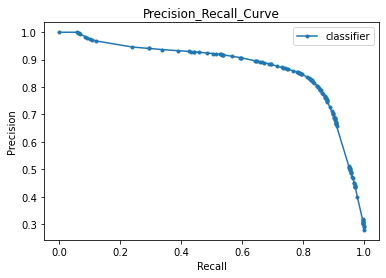

Train ROC-AUC:  0.9439221129529337


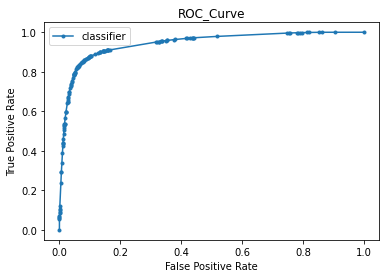

Test PR-AUC:  0.2752288960805541


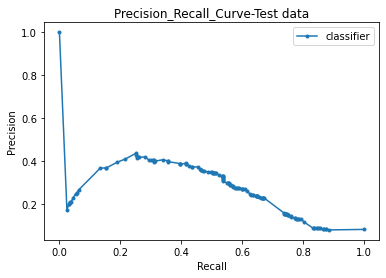

Test ROC-AUC:  0.739689038545571


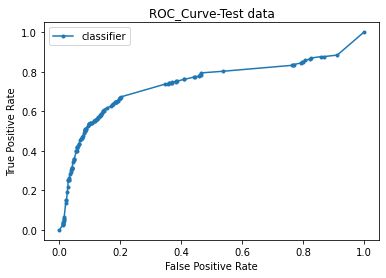

                 Model name  train_accuracy  train_Precision  train_Recall  \
0  Decision Tree Base Model        0.910364         0.836411      0.813325   

   train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  test_Recall  \
0       0.87415       0.943922       0.875863        0.332465     0.525377   

   test_PR_AUC  test_roc_auc  
0     0.275229      0.739689  


In [663]:
##  check the classifier evaluation metrics
dt_base_metrics_df = evaluate_model(decision_tree,'Decision Tree Base Model')

### Grid search for hyper-parameter tuning - Takes about 5-6 mins

In [664]:
#Hyperparameter tuning through grid search
param_dict = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [665]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:38:13 2020


In [666]:
## perform GridSearchCV and fit
grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv = 3,
                   verbose = 1,
                   n_jobs = -1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 610 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  3.9min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=9), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [667]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:42:08 2020


In [668]:
# get the best paramters
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [669]:
## save the best estimator from grid search
best_model = grid.best_estimator_

In [670]:
## display the best estimator from grid search
best_model

DecisionTreeClassifier(max_depth=9)

### Prediction and evaluate Decison tree model with hyperparamters

In [671]:
## fit the best model
best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

Train Accuracy:  0.9102869893052243
Test Accuracy:  0.8768648407926966


Train dataset Confusion Matrix:
 [[18183  1072]
 [ 1260  5479]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     19255
           1       0.84      0.81      0.82      6739

    accuracy                           0.91     25994
   macro avg       0.89      0.88      0.88     25994
weighted avg       0.91      0.91      0.91     25994



Test dataset Confusion Matrix: 
 [[7492  761]
 [ 345  384]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      8253
           1       0.34      0.53      0.41       729

    accuracy                           0.88      8982
   macro avg       0.65      0.72      0.67      8982
weighted avg       0.91      0.88      0.89      8982



Train PR-AUC:  0.8740764540286977


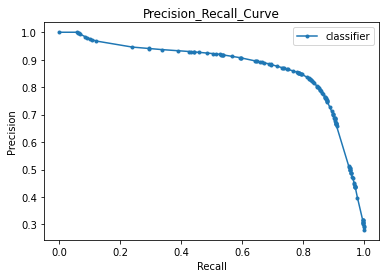

Train ROC-AUC:  0.9439699283547336


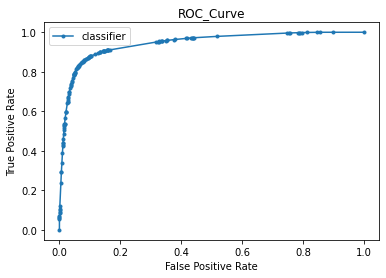

Test PR-AUC:  0.2791574413530079


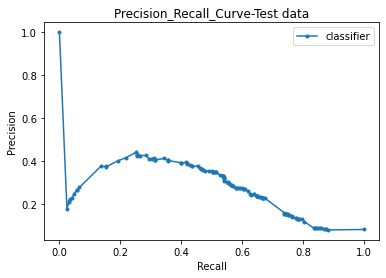

Test ROC-AUC:  0.7421652549507293


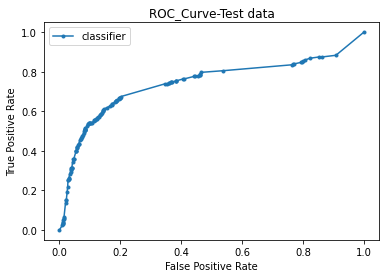

                 Model name  train_accuracy  train_Precision  train_Recall  \
0  Decision Tree Base Model        0.910287         0.836361      0.813029   

   train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  test_Recall  \
0      0.874076        0.94397       0.876865        0.335371     0.526749   

   test_PR_AUC  test_roc_auc  
0     0.279157      0.742165  


In [672]:
##  check the classifier evaluation metrics
dt_hyp_metrics_df = evaluate_model(best_model,'Decision Tree HypTuned Model')

### Adaboost Classifier with PCA

In [673]:
## import the needed libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

### Grid search for hyper-parameter tuning - Takes less than 10 mins

In [674]:
## perform GridSearchsv for adaboost
ada=AdaBoostClassifier()
search_grid={'n_estimators':[100,200,300,500,800],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=-1,cv=3)

In [675]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:42:10 2020


In [676]:
## perform fit using GridSearchCV
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [677]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:51:53 2020


In [678]:
## get the best model from Gridsearch
best_ada_model = search.best_estimator_

In [679]:
## display the best score from Gridsearch
search.best_score_

0.872508914367899

### Predictions and evaluate Adaboost Model

In [680]:
## fit the best model
best_ada_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=800)

Train Accuracy:  0.880780180041548
Test Accuracy:  0.9099309730572256


Train dataset Confusion Matrix:
 [[18150  1105]
 [ 1994  4745]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     19255
           1       0.81      0.70      0.75      6739

    accuracy                           0.88     25994
   macro avg       0.86      0.82      0.84     25994
weighted avg       0.88      0.88      0.88     25994



Test dataset Confusion Matrix: 
 [[7724  529]
 [ 280  449]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8253
           1       0.46      0.62      0.53       729

    accuracy                           0.91      8982
   macro avg       0.71      0.78      0.74      8982
weighted avg       0.92      0.91      0.92      8982



Train PR-AUC:  0.8263091359939527


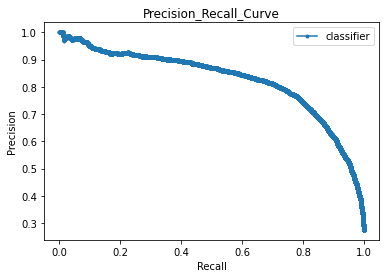

Train ROC-AUC:  0.9306268765252502


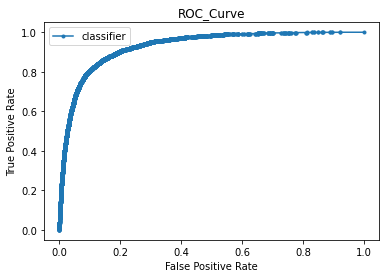

Test PR-AUC:  0.5079805491572621


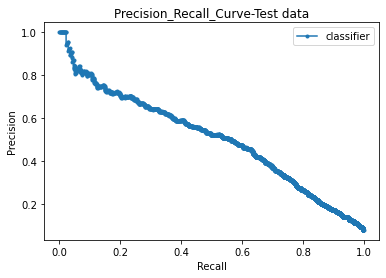

Test ROC-AUC:  0.8804666283383338


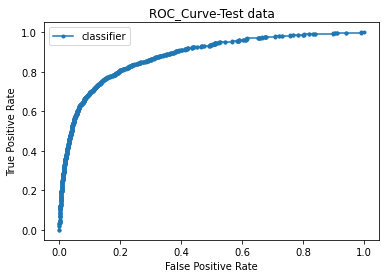

                 Model name  train_accuracy  train_Precision  train_Recall  \
0  Ada Boost HypTuned Model         0.88078         0.811111       0.70411   

   train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  test_Recall  \
0      0.826309       0.930627       0.909931          0.4591     0.615912   

   test_PR_AUC  test_roc_auc  
0     0.507981      0.880467  


In [681]:
##  check the classifier evaluation metrics
ada_hyp_metrics_df = evaluate_model(best_ada_model,'Ada Boost HypTuned Model')

## XGBoost without PCA for Feature Importance

In [682]:
## import the necessary libraries
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [683]:
## read the train and test datasets
telecom_train =  pd.read_csv('telecom_train.csv')
telecom_test =  pd.read_csv('telecom_test.csv')

X_train = telecom_train.drop(columns='Churn')
y_train = telecom_train['Churn']

X_test = telecom_test.drop(columns='Churn')
y_test = telecom_test['Churn']

#### Model without Hyperparameter tuning

In [684]:
## select the columns that are totals of other columns. 
cols =['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'
]

In [685]:
## Drop the selected columns to avoid multicollinearity
X_train = X_train.drop(columns=cols)

In [686]:
## Drop the selected columns to avoid multicollinearity
X_test = X_test.drop(columns=cols)

#### RFE

Tune the Hyperparameters of RFE to get the optimal number of features to select

### Grid search for hyper-parameter tuning - Takes 1-2 mins

In [687]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:54:31 2020


In [688]:
## create hyperparameter list of n_features_to_select and run GridSearchCV to select the optimal parameter

# list of paramters to tune
from sklearn.feature_selection import RFE

params = {'n_features_to_select': [30,40,50,60,70,80,90,100]} 

rf = LinearRegression()
rf.fit(X_train,y_train)
rfe = RFE(rf)

folds = 3

# cross validation
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            

model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=RFE(estimator=LinearRegression()), n_jobs=-1,
             param_grid={'n_features_to_select': [30, 40, 50, 60, 70, 80, 90,
                                                  100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [689]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:55:45 2020


In [690]:
## view the cross validation results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,27.137351,2.336535,0.023270,0.003848,30,{'n_features_to_select': 30},-0.273135,-0.272307,-0.497539,-0.347661,0.105981,8,-0.312779,-0.311947,-0.138298,-0.254341,0.082056
1,28.819185,0.502976,0.030584,0.004487,40,{'n_features_to_select': 40},-0.259984,-0.262635,-0.485155,-0.335925,0.105527,7,-0.296607,-0.298066,-0.138540,-0.244404,0.074860
2,28.121301,0.459025,0.027262,0.003291,50,{'n_features_to_select': 50},-0.255963,-0.258176,-0.481159,-0.331766,0.105640,6,-0.291856,-0.292335,-0.138419,-0.240870,0.072444
3,24.787393,1.916943,0.032910,0.002821,60,{'n_features_to_select': 60},-0.254364,-0.257070,-0.480042,-0.330492,0.105754,5,-0.290074,-0.290369,-0.137734,-0.239392,0.071883
4,23.051373,1.622240,0.032909,0.005699,70,{'n_features_to_select': 70},-0.254156,-0.257653,-0.478958,-0.330256,0.105158,4,-0.289141,-0.289295,-0.137808,-0.238748,0.071375
5,18.770234,0.297395,0.023271,0.011554,80,{'n_features_to_select': 80},-0.253811,-0.257627,-0.478315,-0.329918,0.104945,3,-0.288633,-0.289048,-0.137893,-0.238525,0.071158
6,16.298605,0.396726,0.021607,0.013086,90,{'n_features_to_select': 90},-0.253613,-0.257508,-0.477899,-0.329673,0.104823,2,-0.288470,-0.288510,-0.138084,-0.238354,0.070902
7,13.350539,0.384360,0.029586,0.008706,100,{'n_features_to_select': 100},-0.253313,-0.257462,-0.477929,-0.329568,0.104921,1,-0.288330,-0.288323,-0.138048,-0.238234,0.070842


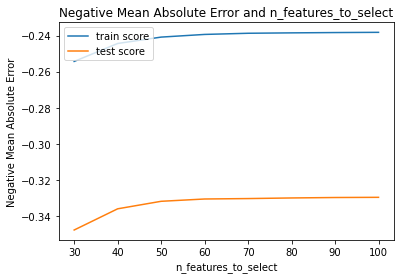

In [691]:
# plotting mean test and train scores with n_features_to_select
cv_results['param_n_features_to_select'] = cv_results['param_n_features_to_select'].astype('float32')

# plotting
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.xlabel('n_features_to_select')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and n_features_to_select")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [692]:
# show the best score and best hyperparameter value
best_score = model_cv.best_score_
best_features_to_select = model_cv.best_params_['n_features_to_select']

print(" The highest test neg MAE is {0} at n_features_to_select = {1}".format(best_score, best_features_to_select))

 The highest test neg MAE is -0.3295681032274857 at n_features_to_select = 100


As seen in the plot the MAE flattens after 50 features.  So select 50 as the best number of features

In [693]:
# run RFE using the best hyperparameter value determined
n_features = 50

rf = LinearRegression()
rf.fit(X_train,y_train)
rfe = RFE(rf,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [694]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 43),
 ('arpu_7', False, 14),
 ('arpu_8', True, 1),
 ('roam_ic_mou_6', False, 68),
 ('roam_ic_mou_7', False, 67),
 ('roam_ic_mou_8', False, 27),
 ('roam_og_mou_6', False, 38),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 6),
 ('loc_og_t2t_mou_6', False, 55),
 ('loc_og_t2t_mou_7', False, 37),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 42),
 ('loc_og_t2m_mou_7', False, 10),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 15),
 ('loc_og_t2f_mou_7', False, 39),
 ('loc_og_t2f_mou_8', False, 81),
 ('loc_og_t2c_mou_6', False, 19),
 ('loc_og_t2c_mou_7', False, 73),
 ('loc_og_t2c_mou_8', False, 58),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 71),
 ('std_og_t2f_mou_7', False, 78),
 ('std_og_t2f_mou_8', False, 18),
 ('isd_og_mou_6', False, 40),
 ('isd_og_mou_7', F

In [695]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_8', 'roam_og_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_7', 'arpu_3g_8',
       'arpu_2g_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'fb_user_8', 'aon', 'aug_vbc_3g', 'recency_of_last_rech',
       'recency_of_last_data_rech'],
  

In [696]:
## select only the columns identified by RFE
X_train = X_train[X_train.columns[rfe.support_]]
X_test =  X_test[X_test.columns[rfe.support_]]

#### Base Model

In [697]:
## create a model object with random parameters
model = XGBClassifier(max_depth=2,tree_method='gpu_hist')

In [698]:
## fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

Train Accuracy:  0.9457567130876356
Test Accuracy:  0.9360944110443108


Train dataset Confusion Matrix:
 [[18708   547]
 [  863  5876]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     19255
           1       0.91      0.87      0.89      6739

    accuracy                           0.95     25994
   macro avg       0.94      0.92      0.93     25994
weighted avg       0.95      0.95      0.95     25994



Test dataset Confusion Matrix: 
 [[7981  272]
 [ 302  427]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      8253
           1       0.61      0.59      0.60       729

    accuracy                           0.94      8982
   macro avg       0.79      0.78      0.78      8982
weighted avg       0.93      0.94      0.94      8982



Train PR-AUC:  0.9576518148812742


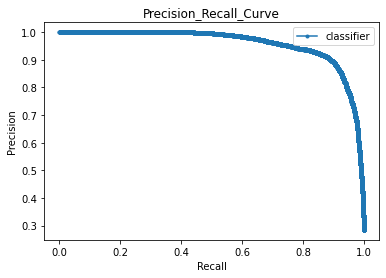

Train ROC-AUC:  0.980939510800158


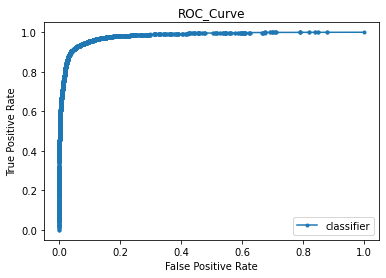

Test PR-AUC:  0.6186059591460272


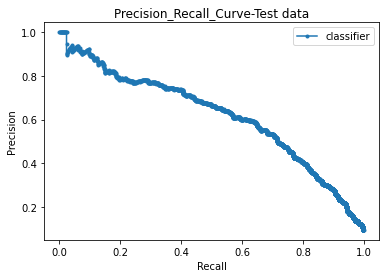

Test ROC-AUC:  0.9243037864437043


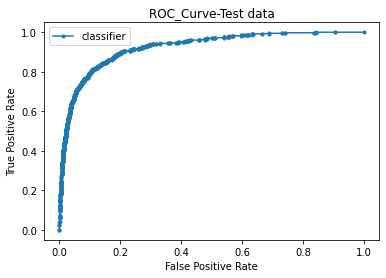

                        Model name  train_accuracy  train_Precision  \
0  XG Boost Feature Imp Base Model        0.945757         0.914837   

   train_Recall  train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  \
0      0.871939      0.957652        0.98094       0.936094        0.610873   

   test_Recall  test_PR_AUC  test_roc_auc  
0     0.585734     0.618606      0.924304  


In [699]:
##  check the classifier evaluation metrics
XG_fi_base_metrics_df = evaluate_model(model,'XG Boost Feature Imp Base Model')

### Grid search for hyper-parameter tuning - Takes about 2-3 mins if run on GPU. Else could take 5-7 mins

In [700]:
## crete a default model object
model = XGBClassifier(tree_method='gpu_hist')

In [701]:
# creating a KFold object with 3 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 101)

# Create the parameter grid 
params = {
    "max_depth" : [2,3],
    "learning_rate": [0.1],
    "n_estimators":[100,200],
    "min_child_weight":[1,10,100],
    "gamma":[0,1,30]
}

In [702]:
# Instantiate the grid search model
model_cv = GridSearchCV(estimator=model, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = "recall")

In [703]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:55:53 2020


In [704]:
## fit the model_cv
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   42.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missi...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                           

In [705]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:56:36 2020


In [706]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.734351,0.474669,0.097739,0.044431,0,0.1,2,1,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.753339,0.763685,0.774711,0.763912,0.008726,19
1,4.101363,0.139032,0.093417,0.010597,0,0.1,2,1,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.817453,0.829105,0.837934,0.828164,0.008388,5
2,1.175189,1.112813,0.063497,0.015155,0,0.1,2,10,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.747551,0.753894,0.770703,0.757383,0.009769,25
3,2.300503,1.181053,0.078457,0.025024,0,0.1,2,10,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.817453,0.819315,0.828584,0.821784,0.004868,9
4,1.995330,0.040816,0.078457,0.016695,0,0.1,2,100,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.735530,0.739208,0.756456,0.743731,0.009122,30
5,3.636940,0.043322,0.091755,0.016827,0,0.1,2,100,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.777827,0.789052,0.794301,0.787060,0.006871,16
6,2.451111,0.061428,0.080451,0.004631,0,0.1,3,1,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.805877,0.813529,0.831256,0.816887,0.010629,12
7,4.625629,0.055785,0.104720,0.022801,0,0.1,3,1,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.855298,0.866489,0.869546,0.863778,0.006124,1
8,2.589408,0.098476,0.076795,0.013699,0,0.1,3,10,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.806322,0.799733,0.826358,0.810804,0.011322,14
9,4.588062,0.015798,0.125996,0.021427,0,0.1,3,10,200,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.852182,0.860258,0.870436,0.860959,0.007469,4


Let's now choose the best hyperparameters. 

In [707]:
# printing the best score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8637776063147024 corresponding to hyperparameters {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}


In [708]:
## get the best estimator from gridsearch
model_best = model_cv.best_estimator_

In [709]:
## display the best model
model_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [710]:
## fit the best model
model_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

Train Accuracy:  0.9494883434638762
Test Accuracy:  0.9382097528390113


Train dataset Confusion Matrix:
 [[18734   521]
 [  792  5947]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     19255
           1       0.92      0.88      0.90      6739

    accuracy                           0.95     25994
   macro avg       0.94      0.93      0.93     25994
weighted avg       0.95      0.95      0.95     25994



Test dataset Confusion Matrix: 
 [[7994  259]
 [ 296  433]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      8253
           1       0.63      0.59      0.61       729

    accuracy                           0.94      8982
   macro avg       0.80      0.78      0.79      8982
weighted avg       0.94      0.94      0.94      8982



Train PR-AUC:  0.9653557737209979


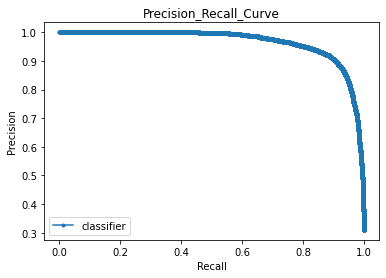

Train ROC-AUC:  0.9849985293941416


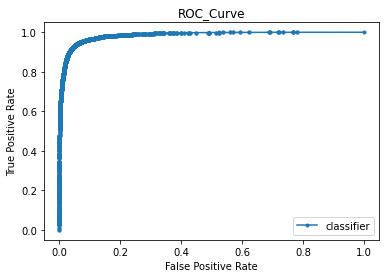

Test PR-AUC:  0.6288813128712059


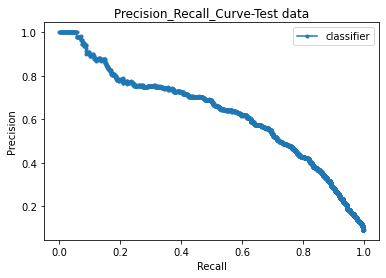

Test ROC-AUC:  0.9291993749789119


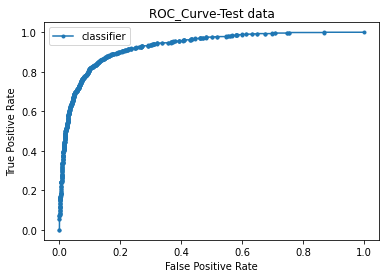

                            Model name  train_accuracy  train_Precision  \
0  XG Boost Feature Imp HypTuned Model        0.949488          0.91945   

   train_Recall  train_PR_AUC  train_roc_auc  test_accuracy  test_Precision  \
0      0.882475      0.965356       0.984999        0.93821        0.625723   

   test_Recall  test_PR_AUC  test_roc_auc  
0     0.593964     0.628881      0.929199  


In [711]:
##  check the classifier evaluation metrics
XG_fi_hyp_metrics_df = evaluate_model(model_best,'XG Boost Feature Imp HypTuned Model')

### Variable importance in XGBoost

In [712]:
## get the best model
model = model_best

In [713]:
## fit the train data on the best model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [714]:
## get the feature importances 
model.feature_importances_

array([0.00357195, 0.01804306, 0.01874642, 0.0069697 , 0.01540798,
       0.01164051, 0.02080938, 0.00351793, 0.00699233, 0.00984858,
       0.01904859, 0.00735671, 0.19080655, 0.02167743, 0.02258001,
       0.02180816, 0.00628431, 0.06411328, 0.01038959, 0.01356463,
       0.03949907, 0.00550728, 0.00377145, 0.02439775, 0.01930775,
       0.01750863, 0.01654214, 0.00745274, 0.01506311, 0.00401937,
       0.0059751 , 0.00409683, 0.00410039, 0.01379705, 0.02380641,
       0.02110191, 0.00403318, 0.        , 0.02888629, 0.00466674,
       0.01250526, 0.00907903, 0.01772836, 0.01726675, 0.        ,
       0.12208884, 0.00583527, 0.00852044, 0.04118664, 0.00907904],
      dtype=float32)

In [715]:
## create a feature importance dataframe
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": model.feature_importances_
})

In [716]:
## display the feature importances dataframe
imp_df=imp_df.sort_values(by="Imp", ascending=False)
imp_df

,Varname,Imp
12,loc_ic_t2m_mou_8,0.190807
45,fb_user_8,0.122089
17,total_rech_amt_8,0.064113
48,recency_of_last_rech,0.041187
20,last_day_rch_amt_8,0.039499
38,sachet_2g_8,0.028886
23,total_rech_data_8,0.024398
34,monthly_2g_7,0.023806
14,total_rech_num_7,0.022580
15,total_rech_num_8,0.021808


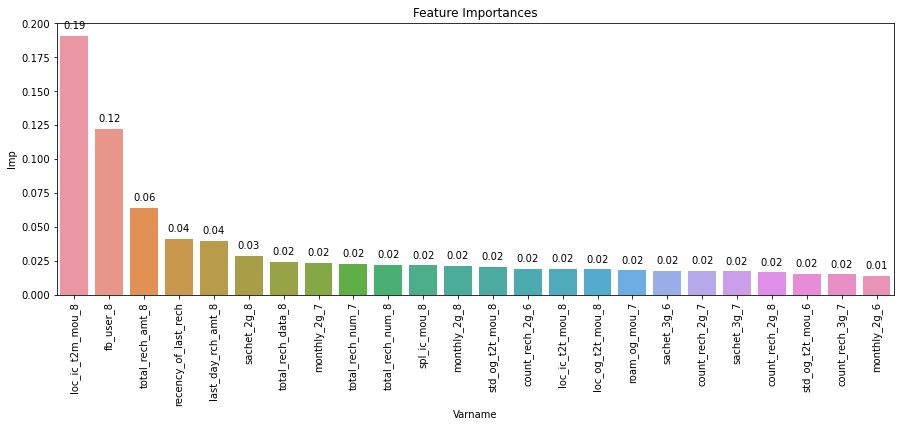

In [717]:
## plot the feature importances of top 25 variables
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=imp_df.iloc[0:24,:], x='Varname', y='Imp',ax=ax)
ax.set_title("Feature Importances")
plt.xticks(rotation=90)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [718]:
## write the importance features to csv
imp_df.to_csv('XGBoost_FeatureImp.csv')

## Logistic Regression without PCA for Feature Importance

In [719]:
## import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [720]:
# Import train the dataset
telecom_train = pd.read_csv("telecom_train.csv")

In [721]:
## check the shape of train 
telecom_train.shape

(25994, 155)

In [722]:
# Separate X and Y from train dataset
y_train = telecom_train.pop('Churn')
X_train = telecom_train

In [723]:
## read the telecom test csv
telecom_test = pd.read_csv("telecom_test.csv")

In [724]:
## check the shape of telecom test
telecom_test.shape

(8982, 155)

In [725]:
# Separate X and Y from test dataset
y_test = telecom_test.pop('Churn')
X_test = telecom_test

In [726]:
## select the columns that are totals of other columns. 
cols =['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'
]

In [727]:
## Drop the selected columns to avoid multicollinearity
X_train = X_train.drop(columns=cols)

In [728]:
## Drop the selected columns to avoid multicollinearity
X_test = X_test.drop(columns=cols)

### RFE

Tune the Hyperparameters of RFE to get the optimal number of features to select

### Grid search for hyper-parameter tuning - Takes 1-2 mins

In [729]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:56:41 2020


In [730]:
## create hyperparameter list of n_features_to_select and run GridSearchCV to select the optimal parameter

# list of paramters to tune
from sklearn.feature_selection import RFE

params = {'n_features_to_select': [30,40,50,60,70,80,90,100]} 

rf = LinearRegression()
rf.fit(X_train,y_train)
rfe = RFE(rf)

folds = 3

# cross validation
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            

model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=RFE(estimator=LinearRegression()), n_jobs=-1,
             param_grid={'n_features_to_select': [30, 40, 50, 60, 70, 80, 90,
                                                  100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [731]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:57:55 2020


In [732]:
# View cross validation results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.104775,0.310881,0.032936,0.001426,30,{'n_features_to_select': 30},-0.273135,-0.272307,-0.497539,-0.347661,0.105981,8,-0.312779,-0.311947,-0.138298,-0.254341,0.082056
1,29.179330,0.204870,0.030917,0.006151,40,{'n_features_to_select': 40},-0.259984,-0.262635,-0.485155,-0.335925,0.105527,7,-0.296607,-0.298066,-0.138540,-0.244404,0.074860
2,28.670389,0.445382,0.027926,0.003552,50,{'n_features_to_select': 50},-0.255963,-0.258176,-0.481159,-0.331766,0.105640,6,-0.291856,-0.292335,-0.138419,-0.240870,0.072444
3,25.378648,0.138857,0.041225,0.009148,60,{'n_features_to_select': 60},-0.254364,-0.257070,-0.480042,-0.330492,0.105754,5,-0.290074,-0.290369,-0.137734,-0.239392,0.071883
4,23.424716,0.181196,0.032913,0.006359,70,{'n_features_to_select': 70},-0.254156,-0.257653,-0.478958,-0.330256,0.105158,4,-0.289141,-0.289295,-0.137808,-0.238748,0.071375
5,19.129902,1.588440,0.019284,0.016005,80,{'n_features_to_select': 80},-0.253811,-0.257627,-0.478315,-0.329918,0.104945,3,-0.288633,-0.289048,-0.137893,-0.238525,0.071158
6,16.396866,0.233762,0.023936,0.007463,90,{'n_features_to_select': 90},-0.253613,-0.257508,-0.477899,-0.329673,0.104823,2,-0.288470,-0.288510,-0.138084,-0.238354,0.070902
7,13.607762,0.542547,0.033246,0.009404,100,{'n_features_to_select': 100},-0.253313,-0.257462,-0.477929,-0.329568,0.104921,1,-0.288330,-0.288323,-0.138048,-0.238234,0.070842


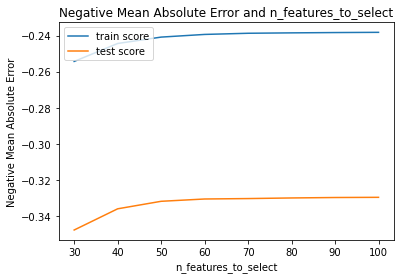

In [733]:
# plotting mean test and train scores with n_features_to_select
cv_results['param_n_features_to_select'] = cv_results['param_n_features_to_select'].astype('float32')

# plotting
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.xlabel('n_features_to_select')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and n_features_to_select")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

As seen in the plot the MAE flattens after 50 features. So select 50 as the best number of features

In [734]:
# run RFE using the best hyperparameter value determined
n_features = 50

rf = LinearRegression()
rf.fit(X_train,y_train)
rfe = RFE(rf,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [735]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 43),
 ('arpu_7', False, 14),
 ('arpu_8', True, 1),
 ('roam_ic_mou_6', False, 68),
 ('roam_ic_mou_7', False, 67),
 ('roam_ic_mou_8', False, 27),
 ('roam_og_mou_6', False, 38),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 6),
 ('loc_og_t2t_mou_6', False, 55),
 ('loc_og_t2t_mou_7', False, 37),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 42),
 ('loc_og_t2m_mou_7', False, 10),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 15),
 ('loc_og_t2f_mou_7', False, 39),
 ('loc_og_t2f_mou_8', False, 81),
 ('loc_og_t2c_mou_6', False, 19),
 ('loc_og_t2c_mou_7', False, 73),
 ('loc_og_t2c_mou_8', False, 58),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 71),
 ('std_og_t2f_mou_7', False, 78),
 ('std_og_t2f_mou_8', False, 18),
 ('isd_og_mou_6', False, 40),
 ('isd_og_mou_7', F

In [736]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_8', 'roam_og_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_7', 'arpu_3g_8',
       'arpu_2g_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'fb_user_8', 'aon', 'aug_vbc_3g', 'recency_of_last_rech',
       'recency_of_last_data_rech'],
  

In [737]:
## select only the columns identified by RFE
X_train = X_train[X_train.columns[rfe.support_]]
X_test =  X_test[X_test.columns[rfe.support_]]

#### Base Model

In [738]:
## create a model object with random parameters
model = LogisticRegression(C=1)

In [739]:
## fit the model
model.fit(X_train, y_train)

LogisticRegression(C=1)

Train Accuracy:  0.878395014234054
Test Accuracy:  0.9052549543531507


Train dataset Confusion Matrix:
 [[17917  1338]
 [ 1823  4916]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     19255
           1       0.79      0.73      0.76      6739

    accuracy                           0.88     25994
   macro avg       0.85      0.83      0.84     25994
weighted avg       0.88      0.88      0.88     25994



Test dataset Confusion Matrix: 
 [[7642  611]
 [ 240  489]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8253
           1       0.44      0.67      0.53       729

    accuracy                           0.91      8982
   macro avg       0.71      0.80      0.74      8982
weighted avg       0.93      0.91      0.91      8982



Train PR-AUC:  0.7994582997210341


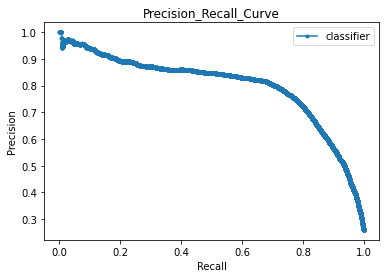

Train ROC-AUC:  0.915254531182682


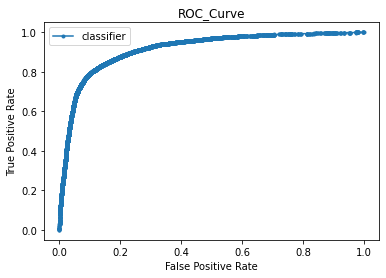

Test PR-AUC:  0.5107530921444615


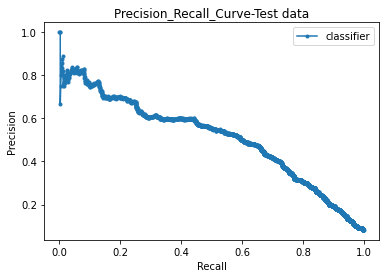

Test ROC-AUC:  0.8881826569446336


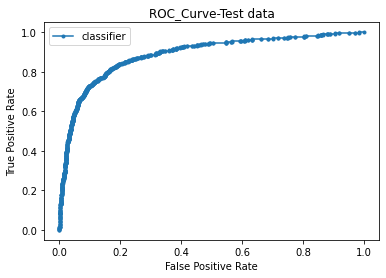

                                   Model name  train_accuracy  \
0  Logistic Regression Feature Imp Base Model        0.878395   

   train_Precision  train_Recall  train_PR_AUC  train_roc_auc  test_accuracy  \
0         0.786057      0.729485      0.799458       0.915255       0.905255   

   test_Precision  test_Recall  test_PR_AUC  test_roc_auc  
0        0.444545     0.670782     0.510753      0.888183  


In [740]:
##  check the classifier evaluation metrics
lr_fi_base_metrics_df = evaluate_model(model,'Logistic Regression Feature Imp Base Model')

In [741]:
## import the necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### Grid search for hyper-parameter tuning - Takes less than 1 min

In [742]:
## Grid Search start time
print("Grid Search Start Time :",ctime())

Grid Search Start Time : Mon Dec 28 20:58:03 2020


In [743]:
## run gridsearch cv for Logistic Regression
model = LogisticRegression()

#penalty = ['l1','l2']
c_values = [1,10,100,1000]
# define grid search
grid = dict(C=c_values)
cv = StratifiedKFold(n_splits=5,  random_state=1,shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [744]:
## Grid search end time
print("Grid Search End Time :",ctime())

Grid Search End Time : Mon Dec 28 20:58:05 2020


In [745]:
## display the best params from gridsearch
grid_result.best_params_

{'C': 1}

In [746]:
## display the best score from gridsearch
grid_result.best_score_

0.8774716125078363

In [747]:
## Create model with the best parameters
Final_model = LogisticRegression(C=1,penalty ='l1',solver = 'liblinear')

In [748]:
## Fit the best model
Final_model.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

Train Accuracy:  0.8783565438178041
Test Accuracy:  0.9051436205744823


Train dataset Confusion Matrix:
 [[17915  1340]
 [ 1822  4917]]


Train dataset Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     19255
           1       0.79      0.73      0.76      6739

    accuracy                           0.88     25994
   macro avg       0.85      0.83      0.84     25994
weighted avg       0.88      0.88      0.88     25994



Test dataset Confusion Matrix: 
 [[7641  612]
 [ 240  489]]


Test dataset Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8253
           1       0.44      0.67      0.53       729

    accuracy                           0.91      8982
   macro avg       0.71      0.80      0.74      8982
weighted avg       0.93      0.91      0.91      8982



Train PR-AUC:  0.7994752440404358


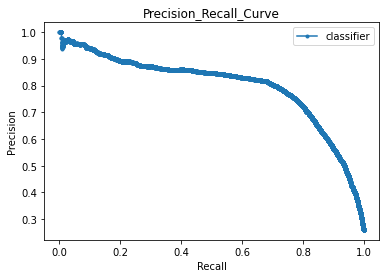

Train ROC-AUC:  0.9152620913259917


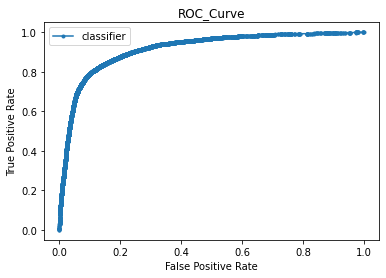

Test PR-AUC:  0.5107762281844016


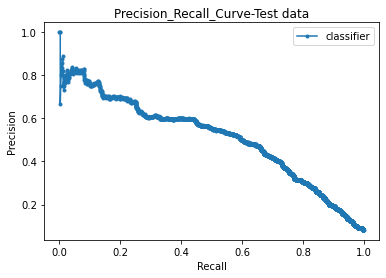

Test ROC-AUC:  0.8881919647791542


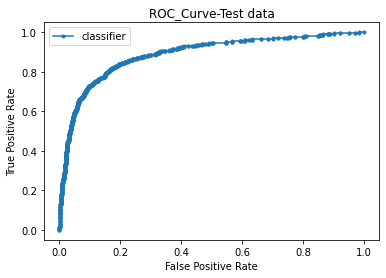

                                       Model name  train_accuracy  \
0  Logistic Regression Feature Imp HypTuned Model        0.878357   

   train_Precision  train_Recall  train_PR_AUC  train_roc_auc  test_accuracy  \
0          0.78584      0.729633      0.799475       0.915262       0.905144   

   test_Precision  test_Recall  test_PR_AUC  test_roc_auc  
0        0.444142     0.670782     0.510776      0.888192  


In [749]:
##  check the classifier evaluation metrics
lr_fi_hyp_metrics_df = evaluate_model(Final_model,'Logistic Regression Feature Imp HypTuned Model')

In [750]:
## save the coefs from the best model
res =Final_model.coef_

In [751]:
## flatten the coeff array
res = res.flatten()

In [752]:
## display the coeff array
res

array([-5.02481105e-02,  1.88738840e-01, -3.81381683e-01, -3.35381986e-01,
        9.86229567e-02,  2.14203015e-01, -5.62372458e-01,  1.04408693e-01,
        2.27923319e-01, -5.39394655e-01, -6.91418694e-01,  7.01585853e-01,
       -2.35672304e+00, -3.34493087e-01,  9.08654991e-02, -3.71960379e-01,
        1.30774879e-01,  1.55226747e-01,  7.21164399e-02,  3.85258691e-02,
       -4.63102778e-01,  0.00000000e+00,  6.38366956e-02, -3.58516026e-01,
        0.00000000e+00,  0.00000000e+00, -1.13811391e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.00311236e-02,  5.91560898e-02,
        1.51256300e-01, -1.05172752e-01, -2.04916573e-01, -1.57773892e-01,
        4.79682678e-02,  3.49557609e-02, -9.64473074e-02, -3.07958262e-04,
       -1.08308141e-01, -3.74437786e-02,  1.45414104e-02,  1.00966497e-01,
        0.00000000e+00, -5.53014525e-01, -2.72081730e-01, -2.52152379e-01,
        3.33375353e-01,  9.17710022e-02])

In [753]:
## get the X_train columns
X_train.columns

Index(['arpu_8', 'roam_og_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_7', 'arpu_3g_8',
       'arpu_2g_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'fb_user_8', 'aon', 'aug_vbc_3g', 'recency_of_last_rech',
       'recency_of_last_data_rech'],
  

In [754]:
## concat the X_train columns and Coeffs to create a dataframe
coef_list = pd.DataFrame(list(zip(X_train.columns,res)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list = coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

,Feature,Coeff,Abs_Coeff
12,loc_ic_t2m_mou_8,-2.356723,2.356723
11,loc_ic_t2m_mou_7,0.701586,0.701586
10,loc_ic_t2t_mou_8,-0.691419,0.691419
6,std_og_t2t_mou_8,-0.562372,0.562372
45,fb_user_8,-0.553015,0.553015
9,std_og_t2m_mou_8,-0.539395,0.539395
20,last_day_rch_amt_8,-0.463103,0.463103
2,loc_og_t2t_mou_8,-0.381382,0.381382
15,total_rech_num_8,-0.371960,0.371960
23,total_rech_data_8,-0.358516,0.358516


In [755]:
## write the coeff list to a csv
coef_list.to_csv("LR_with_Coeff_FI.csv")

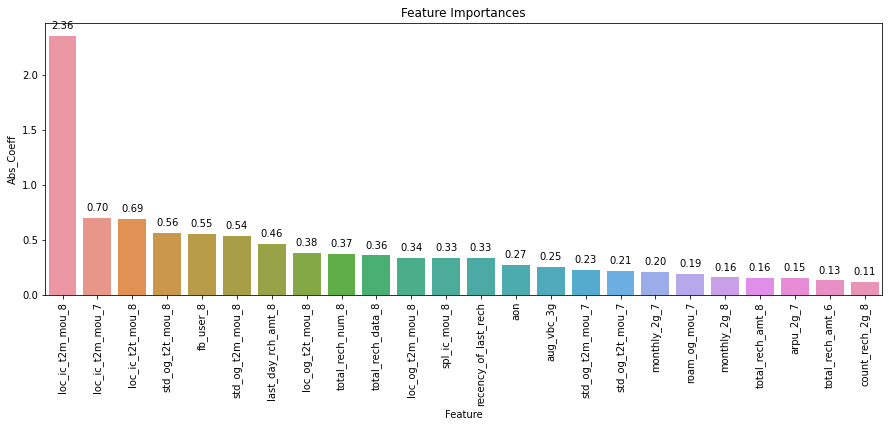

In [756]:
# Plot the Feature Importance 
## plot the feature importances of top 25 variables
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=coef_list.iloc[0:24,:], x='Feature', y='Abs_Coeff',ax=ax)
ax.set_title("Feature Importances")
plt.xticks(rotation=90)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Consolidated metrics

In [761]:
## concat the evaluation from all models and display them
consltd_metrics =pd.concat([lr_base_metrics_df,lr_hyp_metrics_df,xg_base_metrics_df,xg_hyp_metrics_df,gb_base_metrics_df,gb_hyp_metrics_df,
           rf_base_metrics_df,rf_hyp_metrics_df,svm_base_metrics_df,dt_base_metrics_df,dt_hyp_metrics_df,
           ada_hyp_metrics_df,lr_fi_base_metrics_df,lr_fi_hyp_metrics_df,XG_fi_base_metrics_df,XG_fi_hyp_metrics_df
],axis=0)

consltd_metrics

,Model name,train_accuracy,train_Precision,train_Recall,train_PR_AUC,train_roc_auc,test_accuracy,test_Precision,test_Recall,test_PR_AUC,test_roc_auc
0,Logistic Regression Base Model,0.877318,0.785645,0.724440,0.793913,0.914436,0.904253,0.439963,0.658436,0.497594,0.886339
0,Logistic Regression HypTuned Model,0.877395,0.785990,0.724291,0.793927,0.914452,0.904253,0.439963,0.658436,0.497769,0.886336
0,XGBoost Base Model,0.892514,0.822462,0.746550,0.853106,0.940764,0.908595,0.454365,0.628258,0.499685,0.884225
0,XGBoost HypTuned Model,0.904363,0.840621,0.778751,0.886252,0.955257,0.910376,0.460581,0.609053,0.496723,0.888557
0,Gradient Boost Base Model,0.909556,0.853985,0.785428,0.898092,0.958671,0.910042,0.459152,0.609053,0.504249,0.890415
0,Gradient Boost HypTuned Model,0.906825,0.849102,0.779047,0.891919,0.956438,0.910488,0.460815,0.604938,0.504472,0.887837
0,Random Forest Base Model,0.934870,0.925751,0.814067,0.952443,0.982606,0.921064,0.515291,0.462277,0.476816,0.879712
0,Random Forest HypTuned Model,0.927829,0.917855,0.792551,0.942646,0.978709,0.922178,0.522727,0.473251,0.485342,0.878179
0,SVM Base Model,0.911633,0.840540,0.813474,0.879049,0.955626,0.914273,0.479060,0.643347,0.517865,0.903933
0,Decision Tree Base Model,0.910364,0.836411,0.813325,0.874150,0.943922,0.875863,0.332465,0.525377,0.275229,0.739689


In [762]:
## write the consolidated metrics to a xls
consltd_metrics.to_excel('consolidated_metrics.xlsx',index=False)

# Summary and Recommendations

### Considerations for Selecting the best model

1.  High ROC-AUC score for Train and Test indicating strength of model to classify between Churn and Non-Churners
2.  Best Test Recall score indicating strong prediction of actual Churners.  However with adequate trade-off with Precision to avoid high false positivies.  Hence better PR-AUC.  
3.  Less variance between Train and Test models on key metrics ROC-AUC and Recall

### Based on the above considerations the selected model is Logistic Regression with PCA components 

####  Train model metrics
**ROC-AUC : 0.91**
<br>
**Recall : 0.72**
<br>
**Precision : 0.79**
<br>
**PR-AUC : 0.79**
<br>

####  Test model metrics
**ROC-AUC : 0.89**
<br>
**Recall : 0.66**
<br>
**Precision : 0.44**
<br>
**PR-AUC : 0.5**
<br>

## Top 25 variables indicating Churn from Logistic Regression model

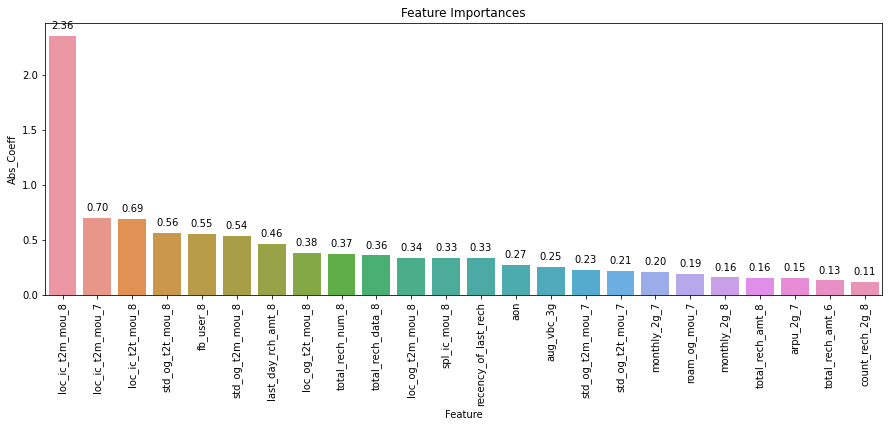

In [763]:
# Plot the Feature Importance 
## plot the feature importances of top 25 variables
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=coef_list.iloc[0:24,:], x='Feature', y='Abs_Coeff',ax=ax)
ax.set_title("Feature Importances")
plt.xticks(rotation=90)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Recommended Strategies:


<br>
<br>
1. As Incoming call MOU is a strong indicator of Churn, Company should monitor the incoming minutes of usage closely to identify drop between Good Phase and Action Phase. 

    >>Special plans to be offered to customers with reduced MOU with reduced tariff
    >>Special plans to be offered to customers with reduced MOU with free subscription of Netflix/Amazon etc
<br>
2. The average AON for Churners is about 1 year.  Company should monitor users with AON close to 1 yr to 1.5 years.  Special calls to be made to those customers randomly to understand their experience and take remedial actions if required to serve them better thereby helping to retain them. 
<br>
<br>
3. As non-FB users tend to churn more, offer free/reduced tariff data packs to encourage FB/social media usage
<br>
<br>
4. As reduced count and amount of Recharges in Action Phase are strong indicators of Churn, company can provide special one-time offers on recharges with discount to retain the customer
<br>
<br>
5. STD outgoing MOU is a strong indicator of Churn.  Company can offer plans like unlimited STD for certain periods in a day (eg. unlimited STD between 7:00PM to 10:00PM)

In [764]:
print("*** Completed *****")

*** Completed *****
